<a href="https://colab.research.google.com/github/MatiasVelazcoGonzalez/Hitos_Analisis_de_datos-/blob/main/Copia_de_Hito_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hito 2: Aplicación de técnicas de aprendizaje supervisado en propiedades geometalúrgicas

Fecha de entrega: 7 septiembre

Integrantes:
- Scarlett Duran  
- Matias Velazco  
- Andreina Isabel Manrique Espin  
- Paz Montaño  
- Sebastián Galleguillos Neyth  

## Objetivo de esta etapa

Para esta segunda etapa, se tienen dos bases de datos a trabajar: 1. Compositos.csv, correspondientes a la base datos organizada en el Hito 1 y 2. MB.csv correspondiente una caracterización geológica y geoestadística del yacimiento en estudio a través de un modelo de bloques del Hito 2.

Se solicita generar modelos de regresión para estimar el consumo especifico de energía (CCE) en este modelo de bloques y modelos de clasificación para determinar a nivel de modelo de bloques los sectores donde existirá un alto requerimiento de consumo energético considerando el umbral indicado en el Hito 1.  En específico se le solicita a su equipo lo siguiente:

1. Realizar un análisis exploratorio del modelo de bloques. Considere que este modelo de bloques fue generado e interpretado por el equipo de geología del proyecto, por lo que corresponde a interpretaciones que consideran el contexto regional del área en estudio. No existen errores en esta base de datos, solo algunos datos sin información.  

2. Definir las variables claves para construir los modelos solicitados. Considere para esto que su objetivo final es completar el modelo de bloques con la variable CCE.  

3. Ajustar modelos de regresión para el consumo de energía específico (CCE) usando la base de datos limpia del Hito 1. Los modelos por utilizar deben incluir por lo menos una regresión lineal múltiple, random forest, decision tree y gradient boosting. Comparar las métricas de desempeño en términos del error absoluto medio (MAE), error cuadrático medio (MSE), raíz del error cuadrático medio (RMSE) y tiempo de cómputo para el conjunto de prueba (testing set correspondiente al 10% de los datos disponibles).

4. Evaluar la significancia de las variables utilizadas en su modelo predictivo construido mediante regresión lineal múltiple. Si corresponde, vuelva a ejecutar la regresión lineal múltiple sólo considerando la/s variable/s significativa/s.

5. Para la técnica con mejor desempeño grafique un scatter plot para comparar los valores reales vs los valores estimados de CCE considerando los datos del conjunto de prueba en su escala original.

6. Finalmente, genere un modelo predictivo del CCE en el modelo de bloques (archivo MB.csv) usando el mejor modelo generado en este Hito. Refiérase a la capacidad de generalización que posee su modelo para predecir la propiedad geometalúrgica presente estadísticas descriptivas de las predicciones de CCE.

Debido a la importancia del CCE en la proyección de costos del proyecto minero. Se les pide generar un proyecto que permita determinar sectores donde el consumo energético será elevado. Para esto deben generar modelos de clasificación que permitan dar respuesta a la problemática antes planteada siguiendo el siguiente flujo de trabajo:  

1. Realizar modelos de clasificación para predecir sectores con alto consumo
energético en el modelo de bloques usando la base de datos limpia del Hito 1. Debe utilizar por lo menos Regresión Logística, Decision Tree Classifier y Support Vector Machines. Se deja abierta la posibilidad de ocupar otros modelos supervisados en caso de no obtener una predicción aceptable. Evaluar el desempeño de cada modelo calculando la matriz de confusión y el reporte de clasificación (precisión, recall, f1-score) sobre el conjunto de prueba (testing set de 10%). Adicionalmente reporte el tiempo de cómputo para cada método.

2. Seleccionar el modelo final a utilizar en base a los indicadores anteriormente descritos.

3. Para el modelo final seleccionado ¿Qué tamaño de set de entrenamiento
recomendaría? ¿Qué se gana y qué se pierde al variar el tamaño del conjunto de entrenamiento? Fundamente su respuesta cualitativa y cuantitativamente. Hint: podría utilizar un análisis de bias y/o variance si lo estima conveniente.

4. Predecir en el modelo de bloques (MB.csv) el nivel de consumo energético usando el modelo anteriormente generado. Comente sobre eventuales problemas operaciones, decisiones estratégicas y propuestas que ustedes proponen para el adecuado desarrollo del proyecto.

# 1 Análisis de Datos de Modelo de Bloques (MB)




## 1.1 Iniciar sesión en google **colab**

In [ ]:
# Iniciamos sesion en nuestro entorno de GDrive
from google.colab import drive
# content/drive es el PATH por defecto donde se encuentra <Mi unidad>
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 1.2 Importando librerias


In [ ]:
# ------------------------------
# Librerías de busqueda, regresión y tiempo
# ------------------------------
import glob
import os
import time  # Import the time module
from time import perf_counter


# ------------------------------
# Librerías para análisis de datos
# ------------------------------
import numpy as np                # Cálculo numérico, manejo de arreglos y operaciones matemáticas rápidas
import pandas as pd               # Manipulación y análisis de datos en estructuras tipo DataFrame
import math                       # Funciones matemáticas básicas


# ------------------------------
# Visualización
# ------------------------------
import matplotlib.pyplot as plt   # Gráficos básicos y personalizables en 2D
import seaborn as sns             # Visualización estadística más atractiva y de alto nivel
from matplotlib.patches import Patch        # Crear leyendas y formas personalizadas en gráficos de Matplotlib
from matplotlib.colors import Normalize     # Normalización de valores para mapas de color
from matplotlib.cm import ScalarMappable    # Mapeo de valores a colores
from mpl_toolkits.mplot3d import Axes3D     # Gráficos 3D en Matplotlib
import plotly.express as px                 # Gráficos interactivos simples
import plotly.graph_objects as go           # Gráficos interactivos más complejos y personalizables

# ------------------------------
# Estadística y análisis exploratorio
# ------------------------------
from scipy import stats                     # Estadística y funciones científicas (pruebas, distribuciones, etc.)
from scipy.stats import gaussian_kde        # Kernel Density Estimation (KDE) para curvas de densidad
from scipy.stats import pearsonr # Import pearsonr
import statsmodels.api as sm                # Modelos estadísticos y econométricos
import statsmodels.formula.api as smf       # Modelos con fórmulas tipo R

# ------------------------------
# Machine Learning / Preprocesamiento
# ------------------------------
from sklearn.impute import KNNImputer       # Imputación de valores faltantes con KNN
from sklearn.preprocessing import MinMaxScaler  # Normalización de datos en un rango (ej. [0,1])
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, f_regression # Import SelectKBest and f_regression

Se utilizaron las librerías anteriores dado que son las más comunes en el manejo de datos y fueron enseñadas en el módulo auxiliar.

##1.3 Lectura y guardado de archivos

A continuación se muestra una tabla que contiene los `readers` y `writers` disponibles.


|   Tipo de Formato   | Descripción de la Data |  Reader  |  Writer |
| -------             | :-----                 |  :-----: | :-----: |
| text   |  CSV |  read_csv | to_csv |
| text |  Fixed-Width Text File| read_fwf |  |
| text   |  JSON | read_json | to_json |
| text   |  HTML |  read_html | to_html |
| text    |  Local clipboard|  read_clipboard | to_clipboard |
|    |  MS Excel |  read_excel | to_excel |
| binary   |  OpenDocument |  read_excel |  |
| binary |  HDF5 Format| read_hdf | to_hdf |
| binary   |  Feather Format | read_feather | to_feather |
| binary   |  Parquet Format |  read_parquet | to_parquet |
| binary    |  ORC Format|  read_orc | |
| binary   |  Msgpack |  read_msgpack | to_msgpack |
| binary |  Stata| read_stata | to_stata |
| binary   |  SAS | read_sas |  |
| binary   |  SPSS |  read_spss |  |
| binary    | Python Pickle Format|  read_pickle | to_pickle |
| SQL   |  SQL |  read_sql | to_sql |
| SQL    | Google BigQuery|  read_gbq | to_gbq |

El detalle de cada una de las funciones se encuentra en el siguiente <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html">link</a>.

### 1.3.1 Busqueda de la ruta del archivo asociada a el MB

In [ ]:
# Buscar en la carpeta 2025 recursivamente
for f in glob.glob("/content/drive/MyDrive/2025/**/*MB*.csv", recursive=True):
    print(f)

/content/drive/MyDrive/2025/Análisis de Datos/Proyecto/Base_de_Datos/MB.csv


### 1.3.2 Lectura del archivo con ruta encontrada

In [ ]:
# Leer el archivo Excel
df_mb = pd.read_csv("/content/drive/MyDrive/2025/Análisis de Datos/Proyecto/Base_de_Datos/MB.csv")

# Mostrar las primeras filas
df_mb.head()

,EAST,NORTH,ELEV,LITO,RX,AXB,BWI,CUT,CUS,DENSI
0,740.62,-796.88,987.5,20.0,2,31.897,21.945,0.640,0.035,2.713
1,746.88,-796.88,987.5,20.0,2,31.910,21.940,0.617,0.031,2.709
2,753.12,-796.88,987.5,20.0,2,31.877,21.934,0.547,0.024,2.699
3,759.38,-796.88,987.5,20.0,2,31.806,21.926,0.383,0.014,2.709
4,765.62,-796.88,987.5,20.0,2,31.708,21.918,0.379,0.017,2.715


## 1.4 Análisis de la Estructura de Datos

Analizaremos:
- Tipos de datos de cada variable
- Memoria utilizada
- Estructura general del dataset

In [ ]:
# Análisis de la estructura del Modelo de Bloques (MB)
print("Información del Modelo de Bloques:")
print("-" * 50)

# Mostrar información general de las columnas
print("\nEstructura general del DataFrame:")
df_mb.info()

# Mostrar tipos de datos específicos
print("\nTipos de datos por columna:")
print(df_mb.dtypes)

# Resumen de las primeras filas
print("\nPrimeras 5 filas del Modelo de Bloques:")
print(df_mb.head())

# Dimensiones del dataset
print(f"\nDimensiones del dataset: {df_mb.shape[0]} filas x {df_mb.shape[1]} columnas")

Información del Modelo de Bloques:
--------------------------------------------------

Estructura general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106791 entries, 0 to 106790
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EAST    106791 non-null  float64
 1   NORTH   106791 non-null  float64
 2   ELEV    106791 non-null  float64
 3   LITO    104329 non-null  float64
 4   RX      106791 non-null  int64  
 5   AXB     106791 non-null  float64
 6   BWI     106791 non-null  float64
 7   CUT     106791 non-null  float64
 8   CUS     106791 non-null  float64
 9   DENSI   106791 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 8.1 MB

Tipos de datos por columna:
EAST     float64
NORTH    float64
ELEV     float64
LITO     float64
RX         int64
AXB      float64
BWI      float64
CUT      float64
CUS      float64
DENSI    float64
dtype: object

Primeras 5 filas del Modelo de Bloques:
     EAS

Del análisis anterior podemos observar:

1. **Dimensiones del Dataset**:
   - Total de registros (filas): 106,791 muestras
   - Total de variables (columnas): 10 variables

2. **Tipos de Variables**:
   - Variables numéricas enteras (int64): `LITO`, `RX`
   - Variables numéricas flotantes (float64): `EAST`, `NORTH`, `ELEV`, `AXB`, `BWI`, `CUT`, `CUS`, `DENSI`
   
3. **Categorización de Variables**:
   - Variables espaciales: `EAST`, `NORTH`, `ELEV` (coordenadas)
   - Variables geológicas: `LITO`, `RX` (códigos litológicos)
   - Variables geometalúrgicas: `AXB`, `BWI`, `CUT`, `CUS`, `DENSI`

4. **Observaciones Importantes**:
   - `LITO` tiene menos registros que las demás variables, indicando valores faltantes
   - Todas las variables son numéricas, incluso las categóricas (`LITO` y `RX`)
   - Las variables espaciales definen la ubicación de cada bloque en el modelo

#### 1.4.1 Valores faltantes por columna


In [ ]:
# Análisis detallado de valores faltantes
print("Análisis de Valores Faltantes:")
print("-" * 50)

# 1. Resumen general de valores faltantes
missing_data = pd.DataFrame({
    'Valores Faltantes': df_mb.isnull().sum(),
    'Porcentaje': (df_mb.isnull().mean() * 100).round(2)
})
missing_data = missing_data.sort_values('Valores Faltantes', ascending=False)
print("\n1. Resumen de valores faltantes:")
print(missing_data)

# 3. Análisis de patrones de valores faltantes
print("\n3. Patrones de valores faltantes:")
# Contar registros con diferentes cantidades de valores faltantes
n_missing = df_mb.isnull().sum(axis=1)
print("\nDistribución de registros según cantidad de valores faltantes:")
print(n_missing.value_counts().sort_index())

Análisis de Valores Faltantes:
--------------------------------------------------

1. Resumen de valores faltantes:
       Valores Faltantes  Porcentaje
LITO                2462        2.31
EAST                   0        0.00
NORTH                  0        0.00
ELEV                   0        0.00
RX                     0        0.00
AXB                    0        0.00
BWI                    0        0.00
CUT                    0        0.00
CUS                    0        0.00
DENSI                  0        0.00

3. Patrones de valores faltantes:

Distribución de registros según cantidad de valores faltantes:
0    104329
1      2462
Name: count, dtype: int64


Del análisis anterior podemos concluir:

1. **Distribución de valores faltantes**:
   - La variable `LITO` es la única que presenta valores faltantes significativos
   - El resto de las variables están completas
   
2. **Implicaciones para el análisis**:
   - Los valores faltantes en `LITO` podrían afectar los análisis que requieran información litológica
   - Las variables geometalúrgicas (`AXB`, `BWI`, etc.) están completas, lo que es positivo para el modelamiento
   - No se requiere imputación para la mayoría de las variables

3. **Recomendaciones**:
   - Verificar si los valores faltantes en `LITO` siguen algún patrón espacial
   - Consultar con el equipo geológico sobre la razón de estos valores faltantes
   - Considerar si es necesario un tratamiento especial para estos casos en el modelamiento

##### Análisis de valores faltantes
El análisis de valores faltantes mostró que **solo la variable LITO presenta un 2,3% de registros sin información**, mientras que el resto de las variables está completamente poblado.  
Esto implica que la litología podría requerir un tratamiento especial (imputación o exclusión puntual), pero la base de datos en general es **robusta y completa para el modelamiento**.

#### 1.4.2 Datos duplicados

In [ ]:
# Análisis de duplicados en el Modelo de Bloques
print("Análisis de duplicados:")
print("-" * 50)

# Contar duplicados totales
n_duplicados = df_mb.duplicated().sum()
print(f"Número total de filas duplicadas: {n_duplicados}")
print(f"Porcentaje de duplicados: {(n_duplicados/len(df_mb)*100):.2f}%")

# Si hay duplicados, mostrar las primeras filas duplicadas
if n_duplicados > 0:
    print("\nEjemplos de filas duplicadas:")
    print(df_mb[df_mb.duplicated(keep=False)].head())

# Verificar duplicados por subconjuntos de columnas relevantes
coords_duplicados = df_mb.duplicated(subset=['EAST', 'NORTH', 'ELEV']).sum()
print(f"\nDuplicados considerando solo coordenadas (EAST, NORTH, ELEV): {coords_duplicados}")

Análisis de duplicados:
--------------------------------------------------
Número total de filas duplicadas: 0
Porcentaje de duplicados: 0.00%

Duplicados considerando solo coordenadas (EAST, NORTH, ELEV): 0


##### Análisis de duplicados
La verificación de duplicados arrojó un **0% de registros repetidos**, tanto en la base general como considerando únicamente las coordenadas (EAST, NORTH, ELEV).  
Este resultado confirma que el modelo de bloques no presenta redundancias en la información y se encuentra consistente en su estructura.


## 1.5 Análisis Estadístico Detallado

En esta sección realizaremos un análisis estadístico completo que incluirá:
1. Estadísticas descriptivas básicas
2. Visualización de distribuciones (histogramas)
3. Análisis de dispersión (boxplots y violin plots)
4. Análisis de correlaciones


In [ ]:
# 1. Estadísticas Descriptivas
print("Estadísticas Descriptivas del Modelo de Bloques:")
print("-" * 50)

# Seleccionar variables de interés (incluyendo espaciales)
vars_interes = ['EAST', 'NORTH', 'ELEV', 'LITO', 'RX', 'AXB', 'BWI', 'CUT', 'CUS', 'DENSI']

# Calcular estadísticas descriptivas (variables como filas, estadísticas como columnas)
desc_stats = df_mb[vars_interes].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

# Mostrar estadísticas con formato mejorado
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
display(desc_stats)

Estadísticas Descriptivas del Modelo de Bloques:
--------------------------------------------------


,EAST,NORTH,ELEV,LITO,RX,AXB,BWI,CUT,CUS,DENSI
count,106791.000,106791.000,106791.000,104329.000,106791.000,106791.000,106791.000,106791.000,106791.000,106791.000
mean,858.682,-458.396,882.906,32.522,5.924,35.321,21.012,0.407,0.023,2.391
std,166.261,226.761,53.626,20.211,3.775,2.987,1.750,0.472,0.031,0.402
min,403.120,-796.880,807.500,10.000,2.000,25.651,14.572,0.001,0.000,1.800
5%,509.380,-771.880,807.500,10.000,2.000,31.325,17.950,0.001,0.000,1.800
25%,759.380,-653.120,837.500,20.000,2.000,33.912,20.597,0.025,0.001,1.800
50%,878.120,-496.880,882.500,20.000,5.000,34.510,21.110,0.167,0.007,2.646
75%,990.620,-265.620,927.500,60.000,10.000,36.184,21.490,0.750,0.042,2.672
95%,1078.120,-65.620,972.500,60.000,13.000,41.263,23.403,1.246,0.070,2.710
max,1096.880,-3.120,987.500,60.000,15.000,50.236,28.996,3.858,0.813,3.054


##### Análisis Estadísticas descriptivas
Las estadísticas descriptivas permiten visualizar la **distribución y rango de valores** de cada variable.  
Se observa que:  
- Las variables espaciales (EAST, NORTH, ELEV) presentan distribuciones amplias que definen el dominio del modelo.  
- **AXB y BWI** muestran valores promedio consistentes con parámetros geometalúrgicos, siendo AXB cercano a 35 y BWI alrededor de 21, medido en minutos.  
- Las leyes de cobre (CUT, CUS) son bajas en promedio, lo que refleja un yacimiento de baja ley típico de la gran minería.  
- La densidad (DENSI) se mantiene en torno a 2,7, coherente con rocas ígneas.  


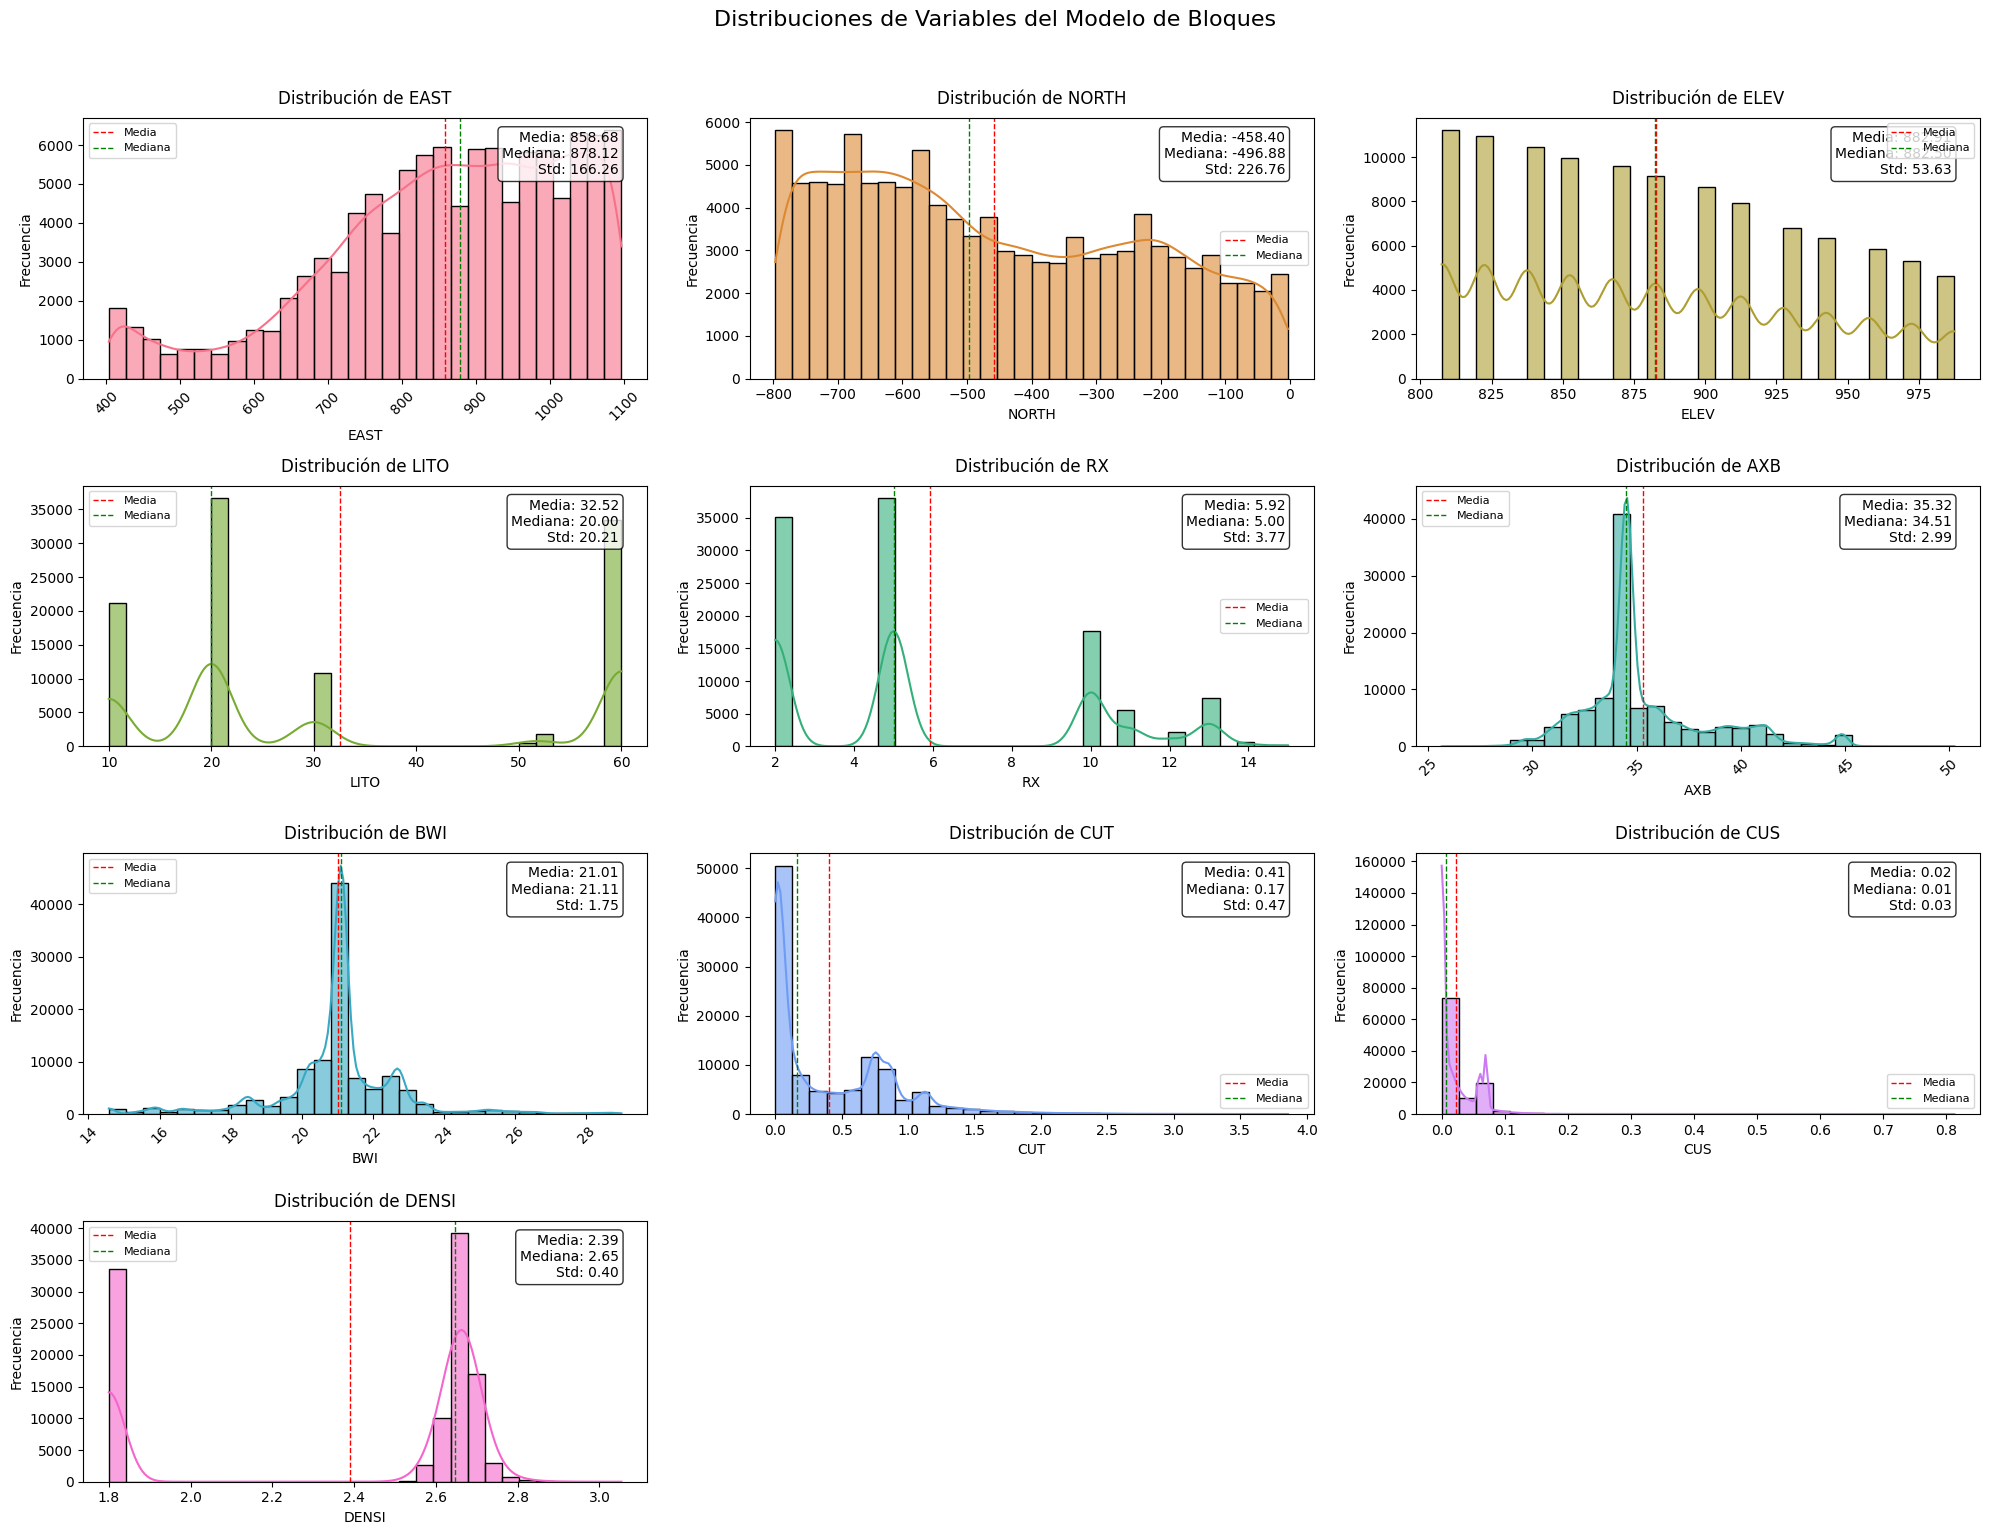

In [ ]:
# Histogramas robustos para cada variable
fig = plt.figure(figsize=(20, 15))

colors = sns.color_palette("husl", len(vars_interes))

for i, (var, color) in enumerate(zip(vars_interes, colors), 1):
    ax = plt.subplot(4, 3, i) # Changed from 3, 3, i to 4, 3, i
    # Convertir a numérico y eliminar NaN
    data = pd.to_numeric(df_mb[var], errors='coerce').dropna()
    if len(data) == 0:
        ax.set_title(f"{var} (sin datos válidos)")
        continue
    sns.histplot(data, bins=30, kde=True, color=color, alpha=0.6)
    plt.axvline(data.mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
    plt.axvline(data.median(), color='green', linestyle='dashed', linewidth=1, label='Mediana')
    stats_text = f'Media: {data.mean():.2f}\nMediana: {data.median():.2f}\nStd: {data.std():.2f}'
    plt.text(0.95, 0.95, stats_text,
             transform=ax.transAxes,
             verticalalignment='top',
             horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.title(f'Distribución de {var}', fontsize=12, pad=10)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=45 if len(str(data.max())) > 5 else 0)

plt.suptitle('Distribuciones de Variables del Modelo de Bloques', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

##### Análisis Histogramas
Los histogramas evidencian la **forma de las distribuciones** de cada variable:  
- AXB y BWI muestran distribuciones cercanas a la normalidad, aunque con ligeras colas hacia valores extremos.  
- CUT y CUS presentan distribuciones fuertemente sesgadas hacia valores bajos, lo cual es esperable en leyes de cobre, con forma de distribución lognormal.  
- La densidad (DENSI) presenta una distribución **bimodal**, con un grupo principal cercano a 2,7 y un subgrupo con valores menores. Esto podría estar asociado a distintos tipos litológicos o variaciones en la mineralogía que afectan la densidad de los bloques.  

En conjunto, se concluye que la mayoría de las variables geometalúrgicas son **estables y con pocas anomalías**, mientras que las leyes y la densidad reflejan heterogeneidad propia del yacimiento.


### Análisis de Categorías Lito y RX

In [ ]:
# Detectamos categóricas base que pudieron existir en entrenamiento
cat_bases = []
for base in ["LITO", "RX"]:
    if base in df_mb.columns:
        cat_bases.append(base)
        print(f"[Base] {base}: {df_mb[base].unique()}")

[Base] LITO: [20. 30. nan 60. 51. 10. 52.]
[Base] RX: [ 2  5 10 14 13 15 11 12]


In [ ]:
conteo_lito = (
    df_mb["LITO"].value_counts(dropna=False)
      .rename_axis("LITO")
      .reset_index(name="N")
      .sort_values("LITO")
)

print("\n>>> Conteo de LITO :")
print(conteo_lito.to_string(index=False))


>>> Conteo de LITO :
  LITO     N
10.000 21141
20.000 36668
30.000 10784
51.000   525
52.000  1837
60.000 33374
   NaN  2462


In [ ]:
conteo_rx = (
    df_mb["RX"].value_counts(dropna=False)
      .rename_axis("RX")
      .reset_index(name="N")
      .sort_values("RX")
)

print("\n>>> Conteo de RX :")
print(conteo_rx.to_string(index=False))


>>> Conteo de RX :
 RX     N
  2 35125
  5 38036
 10 17662
 11  5492
 12  2231
 13  7343
 14   644
 15   258



<font color="red"> No se debe imputar la base de datos, se decide agrupar todos los codigos de 10 al 20 correspondiente a Cavidades en una nueva categoría, segun el código unificado subido. </font>

In [ ]:

# 2) Agrupar 10–15 en 20 (mantengo NaN tal cual)
df_mb["RX"] = pd.to_numeric(df_mb["RX"], errors="coerce")           # por si venía como texto
df_mb["RX"] = df_mb["RX"].mask(df_mb["RX"].between(10, 15), 20)     # 10..15 → 20

# 3) Conteo después
conteo_rx_despues = (
    df_mb["RX"].value_counts(dropna=False)
      .rename_axis("RX")
      .reset_index(name="N")
      .sort_values("RX")
)
print("\n>>> RX después de agrupar 10–15 → 20")
print(conteo_rx_despues.to_string(index=False))


>>> RX después de agrupar 10–15 → 20
 RX     N
  2 35125
  5 38036
 20 33630


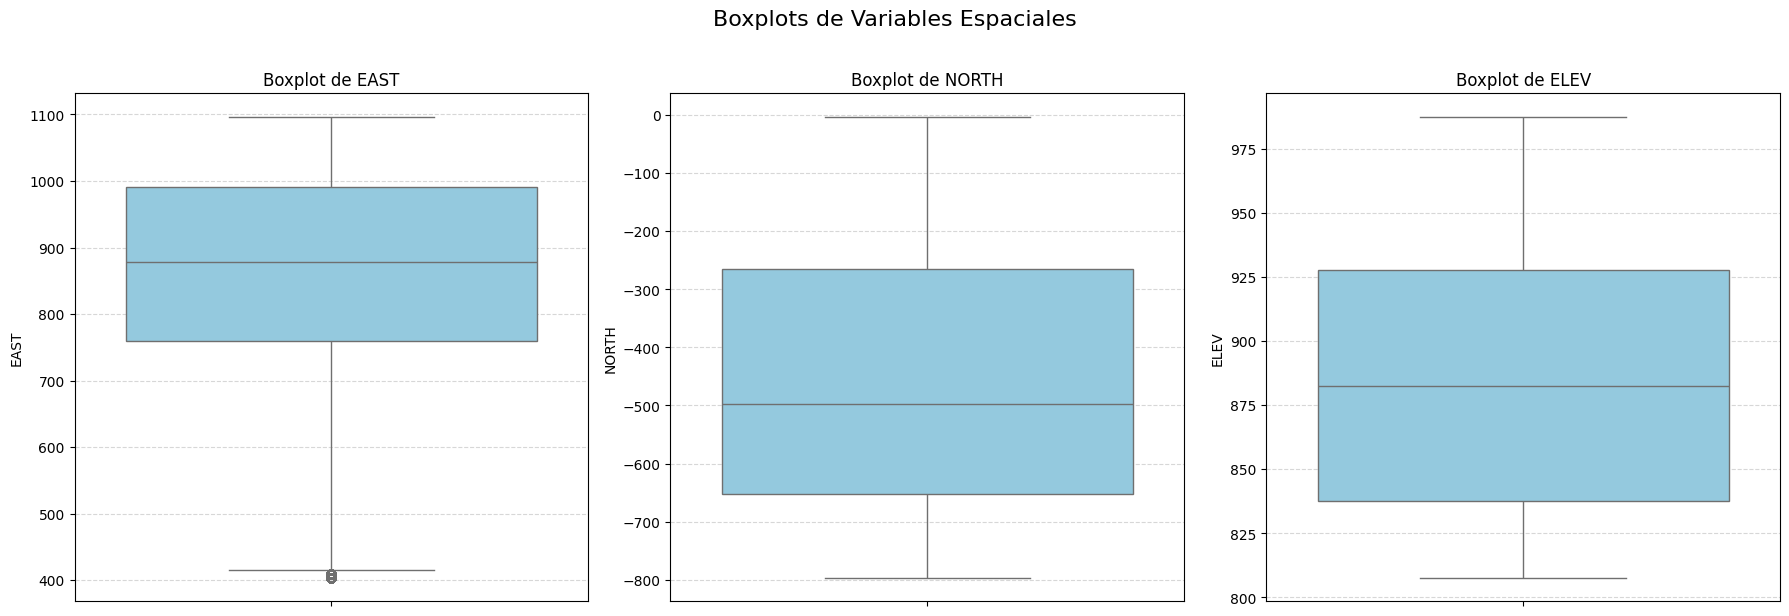

In [ ]:
# Boxplots para variables espaciales
espaciales = ['EAST', 'NORTH', 'ELEV']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, var in enumerate(espaciales):
    data = pd.to_numeric(df_mb[var], errors='coerce').dropna()
    sns.boxplot(y=data, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot de {var}', fontsize=12)
    axes[i].set_ylabel(var, fontsize=10)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.5)
plt.suptitle('Boxplots de Variables Espaciales', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

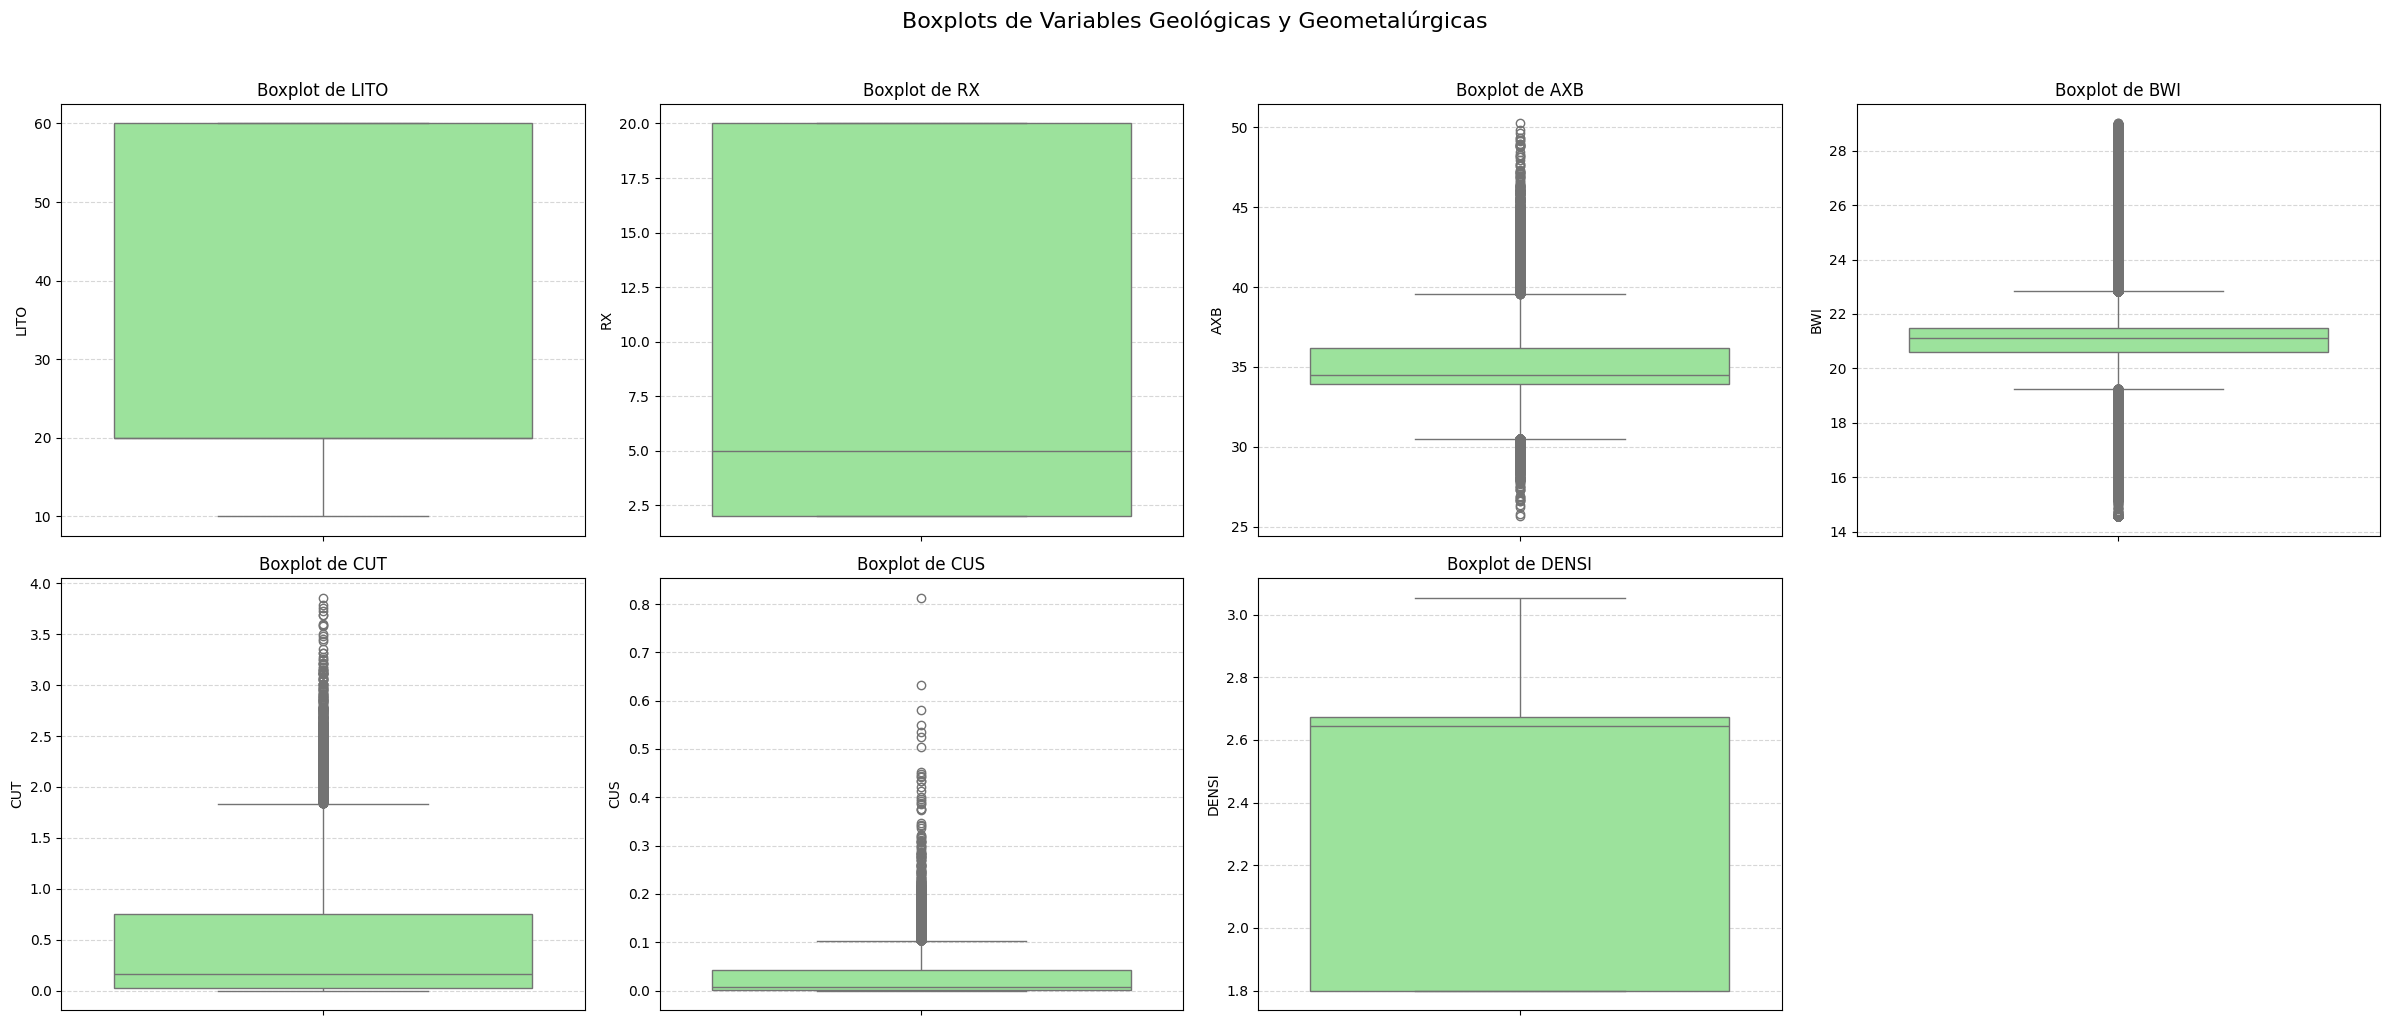

In [ ]:
# Boxplots para variables geológicas y geometalúrgicas
otras_vars = ['LITO', 'RX', 'AXB', 'BWI', 'CUT', 'CUS', 'DENSI']
fig, axes = plt.subplots(2, 4, figsize=(24, 10))
axes = axes.flatten()
for i, var in enumerate(otras_vars):
    data = pd.to_numeric(df_mb[var], errors='coerce').dropna()
    sns.boxplot(y=data, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot de {var}', fontsize=12)
    axes[i].set_ylabel(var, fontsize=10)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.5)
# Eliminar subplots vacíos si hay menos de 8 variables
for j in range(len(otras_vars), len(axes)):
    fig.delaxes(axes[j])
plt.suptitle('Boxplots de Variables Geológicas y Geometalúrgicas', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

##### Análisis Boxplots
Los boxplots permiten detectar **valores atípicos y dispersión**:  
- Para las variables espaciales no se observan outliers, confirmando una correcta delimitación del dominio.  
- En variables geometalúrgicas se detectan algunos valores extremos en CUT y CUS, probablemente asociados a bloques mineralizados puntuales.  
- En AXB y BWI los valores están más contenidos, con variaciones moderadas.  

Esto sugiere que los outliers identificados son parte de la naturaleza del yacimiento y no necesariamente errores de medición. Análisis confirmado por el enunciado del proyecto en donde se indica:

*"(...)Considere que este modelo
de bloques fue generado e interpretado por el equipo de geología del proyecto, por lo
que corresponde a interpretaciones que consideran el contexto regional del área en
estudio. No existen errores en esta base de datos, solo algunos datos sin
información."*

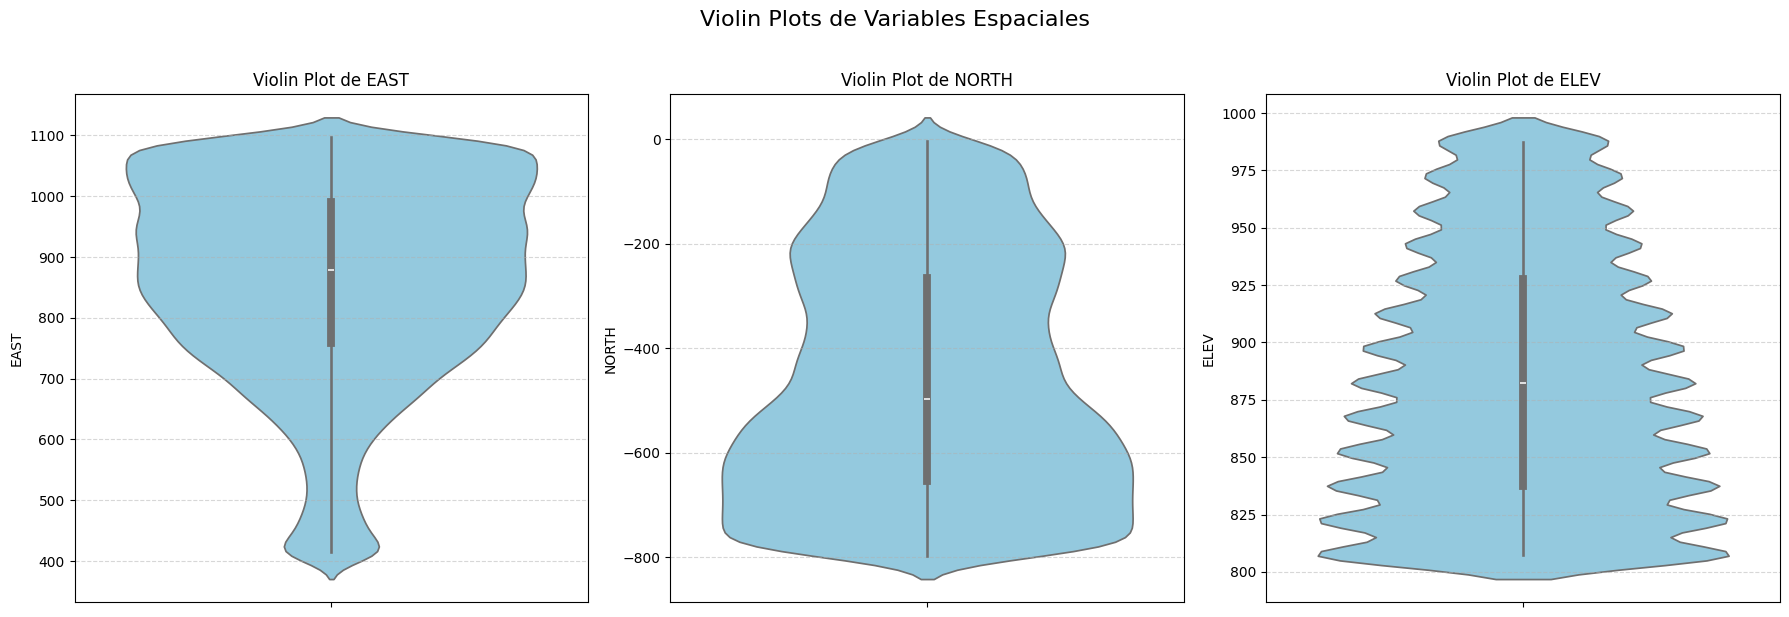

In [ ]:
# Violin plots para variables espaciales
import matplotlib.pyplot as plt
import seaborn as sns

espaciales = ['EAST', 'NORTH', 'ELEV']
fig, axes = plt.subplots(1, len(espaciales), figsize=(18, 6))
for i, var in enumerate(espaciales):
    data = pd.to_numeric(df_mb[var], errors='coerce').dropna()
    sns.violinplot(y=data, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Violin Plot de {var}', fontsize=12)
    axes[i].set_ylabel(var, fontsize=10)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.5)
plt.suptitle('Violin Plots de Variables Espaciales', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

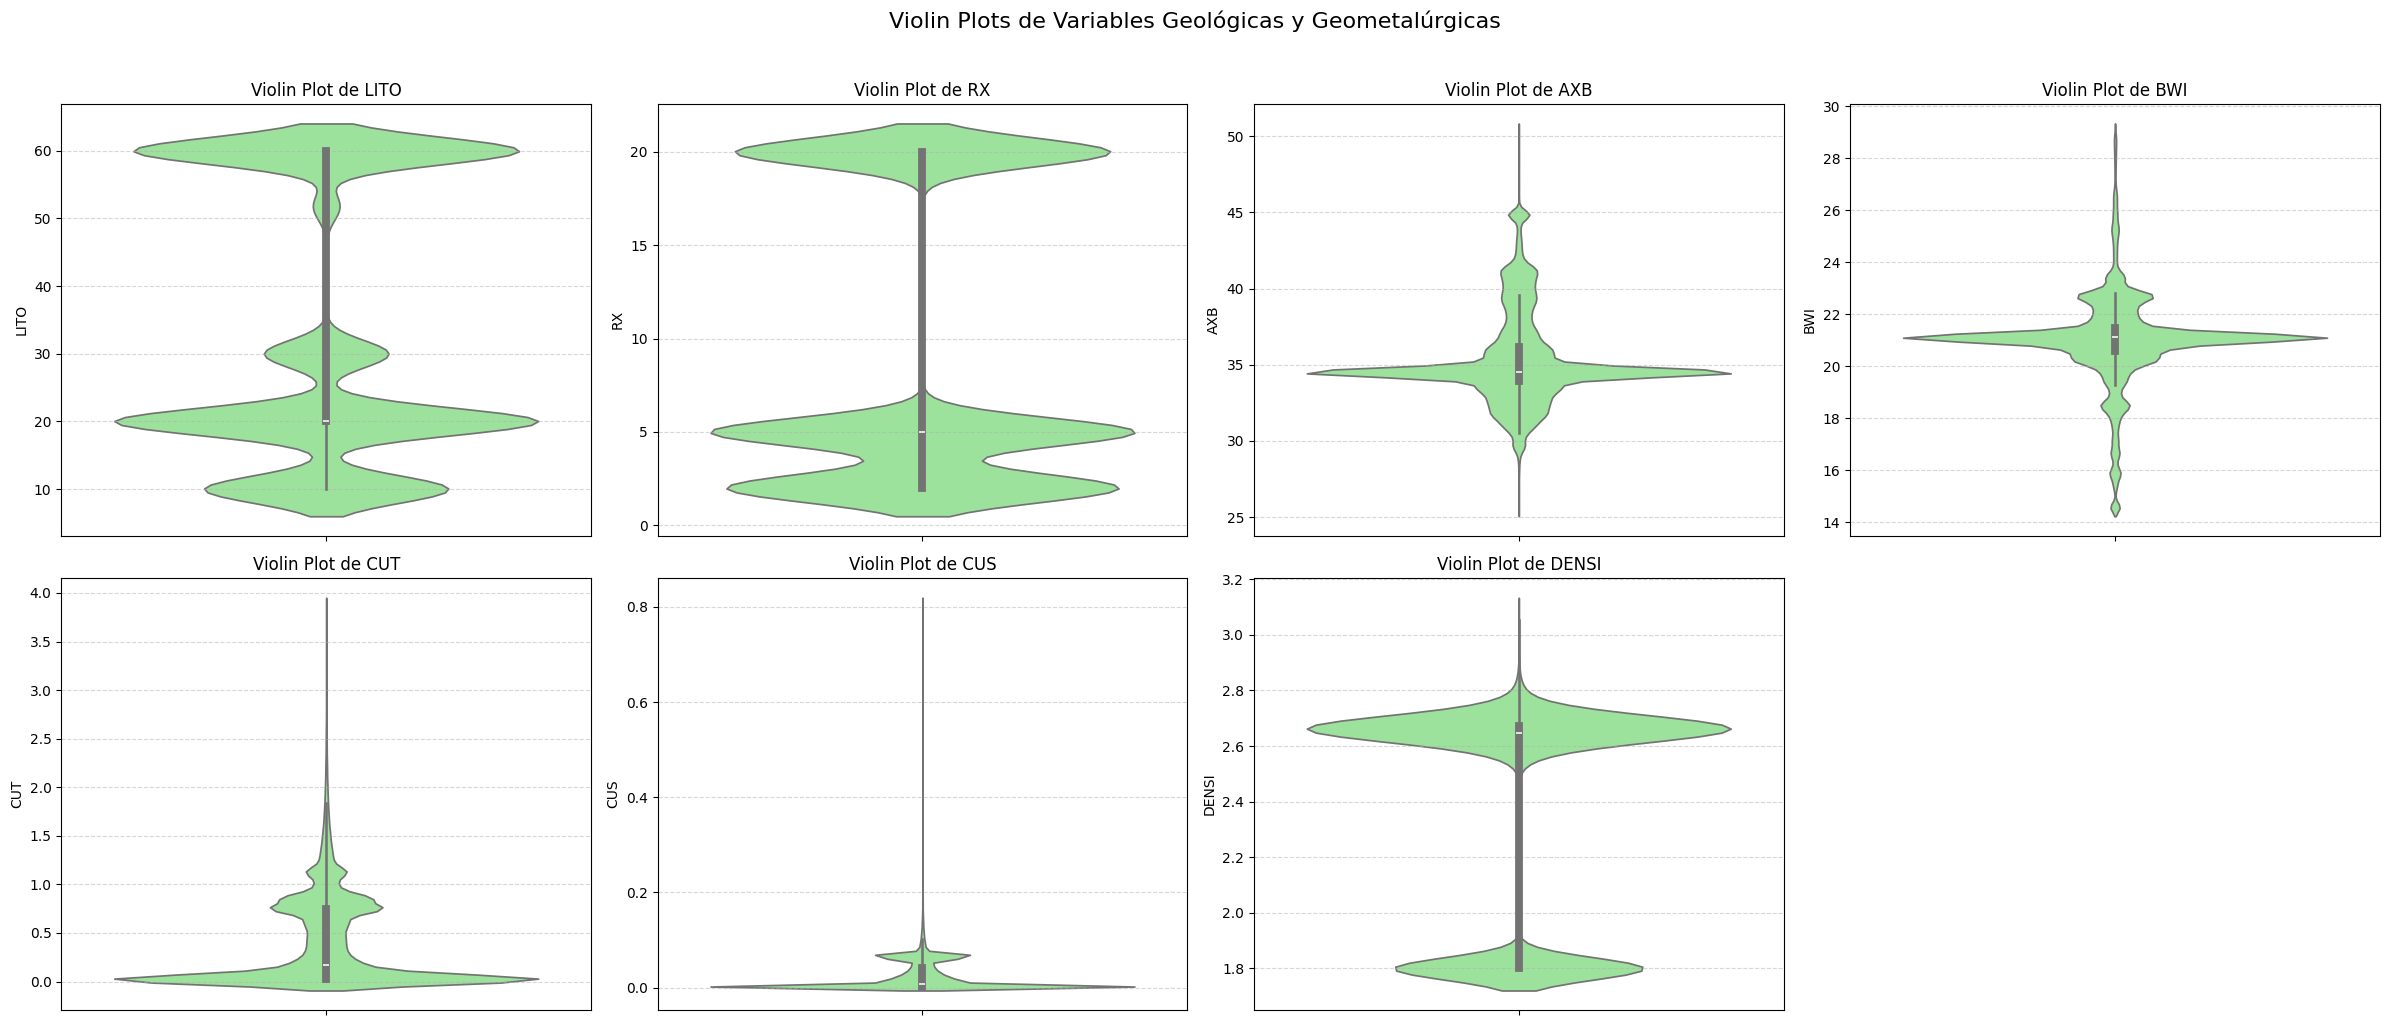

In [ ]:
# Violin plots para variables geológicas y geometalúrgicas
import matplotlib.pyplot as plt
import seaborn as sns

otras_vars = ['LITO', 'RX', 'AXB', 'BWI', 'CUT', 'CUS', 'DENSI']
fig, axes = plt.subplots(2, 4, figsize=(24, 10))
axes = axes.flatten()
for i, var in enumerate(otras_vars):
    data = pd.to_numeric(df_mb[var], errors='coerce').dropna()
    sns.violinplot(y=data, ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Violin Plot de {var}', fontsize=12)
    axes[i].set_ylabel(var, fontsize=10)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.5)
# Eliminar subplots vacíos si hay menos de 8 variables
for j in range(len(otras_vars), len(axes)):
    fig.delaxes(axes[j])
plt.suptitle('Violin Plots de Variables Geológicas y Geometalúrgicas', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

##### Análisis Violin plots

Los violin plots complementan la visión anterior mostrando la **densidad de las distribuciones**:  

- **CUT y CUS** confirman su concentración en valores bajos, con pocos casos en la cola superior.  
- **AXB y BWI** presentan distribuciones unimodales, lo que respalda su utilidad como predictores estables en modelos supervisados.  
- **DENSI** exhibe una distribución **bimodal**, evidenciando la presencia de dos poblaciones de densidad diferenciadas dentro del yacimiento.   

En general, las distribuciones son consistentes con un yacimiento heterogéneo en leyes y con parámetros físicos que, aunque en su mayoría estables, muestran particularidades relevantes como la bimodalidad de la densidad.

In [ ]:
# Mapa de correlación para variables geológicas y geometalúrgicas (excluyendo espaciales)
# Variables a correlacionar



def plot_correlation_map(df, variables, title="Mapa de Correlación"):
    """
    Genera un mapa de correlación (heatmap) para un conjunto de variables numéricas.

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame con los datos.
    variables : list
        Lista de nombres de columnas a incluir en la matriz de correlación.
    title : str
        Título del gráfico.
    """
    # Convertir variables seleccionadas a numéricas (ignora errores)
    df_corr = df[variables].apply(pd.to_numeric, errors='coerce')

    # Matriz de correlación
    corr_matrix = df_corr.corr()

    # Gráfico
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap="RdBu_r",   # paleta invertida (rojo = +1, azul = -1)
        fmt=".2f",
        linewidths=0.5,
        center=0,
        vmin=-1,
        vmax=1
    )
    plt.title(title)
    plt.tight_layout()
    plt.show()

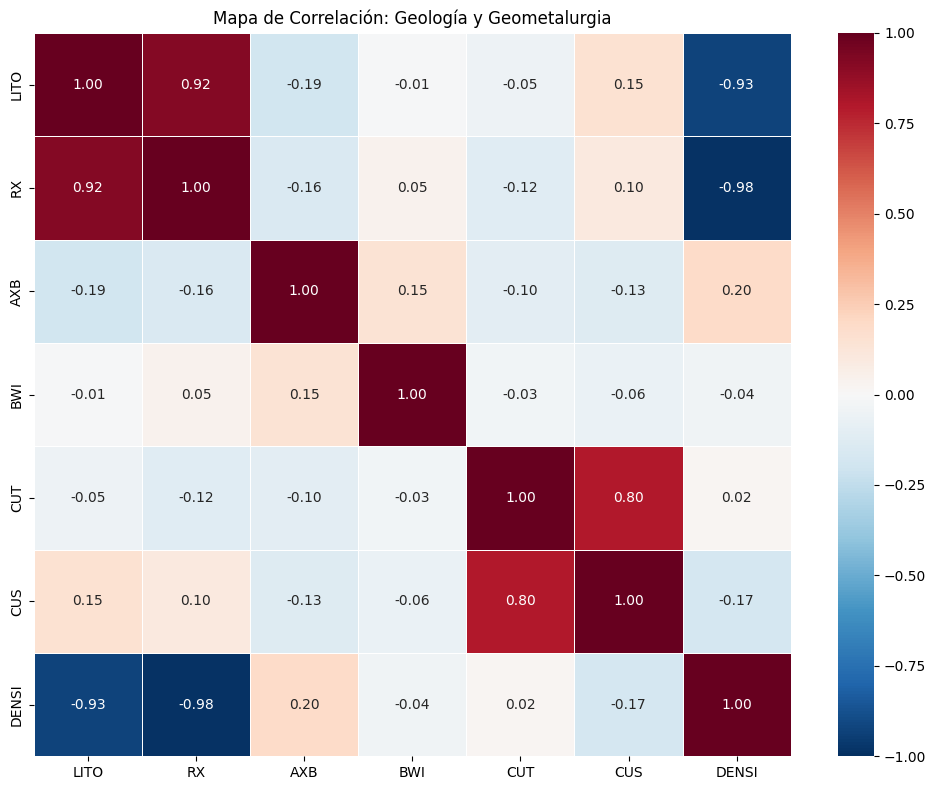

In [ ]:
corr_vars = ['LITO', 'RX', 'AXB', 'BWI', 'CUT', 'CUS', 'DENSI']
plot_correlation_map(df_mb, corr_vars, title="Mapa de Correlación: Geología y Geometalurgia")

In [ ]:
# Identificar correlaciones fuertes (>0.5 o <-0.5) entre variables geológicas y geometalúrgicas (sin duplicados)
import numpy as np
corr_vars = ['LITO', 'RX', 'AXB', 'BWI', 'CUT', 'CUS', 'DENSI']
df_corr = df_mb[corr_vars].apply(pd.to_numeric, errors='coerce')
corr_matrix = df_corr.corr()
strong_pos = []
strong_neg = []
checked = set()
for i in corr_matrix.columns:
    for j in corr_matrix.index:
        if i != j and (j, i) not in checked:
            val = corr_matrix.loc[j, i]
            if val > 0.5:
                strong_pos.append((j, i, round(val,2)))
            elif val < -0.5:
                strong_neg.append((j, i, round(val,2)))
            checked.add((i, j))
print('Correlaciones mayores a 0.5:')
for rel in strong_pos:
    print(f'{rel[0]} vs {rel[1]}: {rel[2]}')
print('\nCorrelaciones menores a -0.5:')
for rel in strong_neg:
    print(f'{rel[0]} vs {rel[1]}: {rel[2]}')

Correlaciones mayores a 0.5:
RX vs LITO: 0.92
CUS vs CUT: 0.8

Correlaciones menores a -0.5:
DENSI vs LITO: -0.93
DENSI vs RX: -0.98


##### Análisis Matriz de correlación
El mapa de correlación evidencia las **relaciones lineales entre variables geológicas y geometalúrgicas**:  
- Se observa una correlación positiva fuerte entre **CUT y CUS**, lo que indica posible redundancia al momento de modelar.  
- AXB y BWI presentan correlaciones moderadas con las leyes, lo que respalda su vínculo indirecto con la mineralización.  
- La variable litológica (LITO) se correlaciona en menor grado, sugiriendo que actúa más como discriminante categórico que como predictor continuo.  

Este análisis permite definir que, aunque CUT y CUS deben considerarse inicialmente, es recomendable evaluar su redundancia mediante PCA u otros métodos de reducción de dimensionalidad.

# 2 Definir las variables claves para construir los modelos solicitados.

En esta etapa se buscó determinar cuáles son las variables más relevantes para la construcción de los modelos supervisados y no supervisados cuyo objetivo es completar el modelo de bloques con la variable **CCE (Consumo Específico de Energía)**.  


### 2.1 Análisis exploratorio previo

El análisis exploratorio permitió comprender la naturaleza de las variables y orientar la selección de atributos:  

- **Valores faltantes**: solo se detectó un 2,3% en la variable LITO, mientras que el resto de los atributos se encuentra completo, lo que entrega una base sólida para el modelamiento.  
- **Duplicados**: no se encontraron registros repetidos, garantizando consistencia en los datos.  
- **Histogramas**: AXB y BWI presentaron distribuciones cercanas a la normalidad, CUT y CUS mostraron sesgo hacia valores bajos, y la densidad (DENSI) exhibió una clara **bimodalidad**, indicando la existencia de más de una población litológica.  
- **Boxplots y violin plots**: confirmaron la presencia de outliers naturales en CUT y CUS, mientras que AXB y BWI fueron más estables. En los violin plots, la bimodalidad de DENSI volvió a evidenciarse, reforzando la importancia de considerar esta variable como diferenciadora en el yacimiento.  
- **Matriz de correlación**: se detectó una correlación fuerte entre CUT y CUS, lo que sugiere posible redundancia. AXB y BWI mantienen correlaciones moderadas con leyes de cobre, mientras que LITO y RX funcionan más como clasificadores categóricos.  





## 2.1 Variables seleccionadas



### 2.1.1 Variables espaciales (EAST, NORTH, ELEV)

Definen la ubicación de cada bloque dentro del modelo.  
Aunque no se relacionan de manera directa con el consumo específico de la roca, son esenciales para capturar **tendencias espaciales** y reflejar variaciones regionales de la geología.



### 2.1.2 Variables geológicas (LITO, RX)

- **LITO**: código litológico que distingue los diferentes tipos de roca.  
- **RX**: clasificación de roca.  

Ambas son críticas para discriminar bloques con distinto comportamiento geometalúrgico y permiten mejorar la capacidad predictiva de los modelos.



### 2.1.3 Variables geometalúrgicas (AXB, BWI, CUT, CUS, DENSI)
- **AXB**: parámetro de resistencia a la fractura (Drop Weight Test). Valores altos suelen asociarse a menor consumo energético.  
- **BWI**: Bond Work Index, medida directa de resistencia a la molienda, correlacionada positivamente con CCE.  
- **CUT y CUS**: leyes de cobre total y soluble. Pueden aportar información indirecta sobre mineralogía y alteración, aunque deben revisarse por posible redundancia.  
- **DENSI**: densidad de la roca, variable física fundamental que afecta la energía requerida en molienda.



## 2.2 Variables excluidas

- **En Compositos.csv**: **SGI**, debido a su correlación casi perfecta con CCE.  
- **En MB.csv**: no se excluyen variables a priori, pero se recomienda evaluar la redundancia entre **CUT y CUS** antes de modelar.  




## 2.3 **Conclusión**
Las variables claves para completar el modelo de bloques con la variable CCE son:  

**EAST, NORTH, ELEV, LITO, RX, AXB, BWI, CUT, CUS y DENSI**,  
excluyendo **SGI** en la base de compositos y considerando la posible redundancia entre **CUT y CUS** en el modelo de bloques.  

El análisis exploratorio respalda esta selección al evidenciar **bimodalidad en la densidad, correlaciones fuertes en leyes y distribuciones consistentes en AXB y BWI**, confirmando que el conjunto de variables elegido es representativo y robusto para los modelos supervisados y no supervisados.

# 3 Ajustar modelos de regresión para el consumo de energía específico (CCE)

Ajustar modelos de regresión para el consumo de energía específico (CCE) usando
la base de datos limpia del Hito 1. Los modelos por utilizar deben incluir por lo
menos una regresión lineal múltiple, random forest, decision tree y gradient
boosting. Comparar las métricas de desempeño en términos del error absoluto
medio (MAE), error cuadrático medio (MSE), raíz del error cuadrático medio (RMSE)
y tiempo de cómputo para el conjunto de prueba (testing set correspondiente al 10%
de los datos disponibles).

## 3.1 Busqueda de la ruta del archivo asociada a los compósitos


In [ ]:
# Buscar en la carpeta 2025 recursivamente
for f in glob.glob("/content/drive/MyDrive/2025/**/*Compositos_cleaned_imputed*.csv", recursive=True):
    print(f)

/content/drive/MyDrive/2025/Análisis de Datos/Proyecto/Base_de_Datos/Compositos_cleaned_imputed.csv


## 3.2 Lectura del archivo con ruta encontrada


In [ ]:
# Leer el archivo Excel
df_compositos = pd.read_csv("/content/drive/MyDrive/2025/Análisis de Datos/Proyecto/Base_de_Datos/Compositos_cleaned_imputed.csv")

# Mostrar las primeras filas
df_compositos.head()

,REF,EAST,NORTH,ELEV.,LITO_COD,LITO_DESC,RX_DESC,RX_UNIFI,SGI_CAP,AXB_CAP,BWI_CAP,CCE_CAP,ENERGY_CONSUMPTION,ELEV_BIN,SGI_CAP_KNN_IMPUTED,AXB_CAP_KNN_IMPUTED,BWI_CAP_KNN_IMPUTED,CCE_CAP_IMPUTED
0,1,1015.600,-95.150,958.200,10.000,Riodacita,Estéril,5.000,NaN,NaN,22.100,NaN,NaN,"[955, 1055)",122.800,40.992,22.100,18.549
1,2,1024.800,-95.350,1032.700,NaN,NaN,Estéril,5.000,NaN,NaN,20.736,NaN,NaN,"[955, 1055)",147.200,40.511,20.736,20.530
2,3,979.600,-274.550,906.400,10.000,Riodacita,Sulfuro in situ,2.000,NaN,NaN,21.161,NaN,NaN,"[855, 955)",122.000,40.013,21.161,18.481
3,4,995.200,-112.050,931.000,10.000,Riodacita,Sulfuro in situ,2.000,NaN,NaN,20.015,NaN,NaN,"[855, 955)",119.200,42.890,20.015,18.242
4,5,984.700,-125.350,924.300,10.000,Riodacita,Sulfuro in situ,2.000,NaN,NaN,20.028,NaN,NaN,"[855, 955)",137.600,41.893,20.028,19.769


## 3.3 Ajustes Modelos de Regresion


**Criterios de datos usados.**  
- Se utiliza la **base limpia sin imputación** del Hito 1.  
- Se emplean **variables *capeadas* (sufijo `_CAP`)** para reducir la influencia de outliers sin introducir sesgos por imputación.  
- Se **excluye SGI** en cualquier forma (p.ej., `SGI_CAP`), dado que en Compositos se observó correlación casi perfecta con **CCE**, lo que produciría redundancia y sobreajuste.  
- Para el modelo se eliminan filas con `NaN` solo en el **target** y en los **predictores seleccionados** (lista completa-case minimal).

**Métrica y partición.**  
- Conjunto de **prueba = 10%** (aleatorio, `random_state=42`).  
- Se comparan **MAE**, **MSE**, **RMSE** y **tiempo de cómputo**.

**Modelos considerados.**  
- Regresión lineal múltiple  
- Decision Tree Regressor  
- Random Forest Regressor  
- Gradient Boosting Regressor

#### 3.3.1  Identifica la variable objetivo y las variables predictoras relevante

In [ ]:
# 1) Identifica la variable objetivo y las variables predictoras relevantes (sin SGI y sin imputación)
target_variable = 'CCE_CAP'

# Columnas espaciales disponibles (soporta 'ELEV' o 'ELEV.')
spatial_cols = []
for c in ['EAST', 'NORTH', 'ELEV.']:
    if c in df_compositos.columns:
        spatial_cols.append(c)

# Candidatas: columnas CAP/UNIFI de la base limpia, excluyendo SGI/IMPUT y el target
# (y excluyendo cualquier otra variante de CCE para evitar fuga de información)
predictor_candidates = []
for col in df_compositos.columns:
    name = str(col).upper()
    if name == target_variable.upper():
        continue
    if 'IMPUT' in name:       # evita columnas imputadas
        continue
    if 'SGI' in name:         # excluye SGI en cualquier forma (SGI_CAP, SGI_UNIFI, etc.)
        continue
    if 'CCE' in name:         # evita colar otras variantes de CCE además del target
        continue
    if ('UNIFI' in name) or ('CAP' in name) or ('COD' in name):
        predictor_candidates.append(col)

# Predictores finales (espaciales + candidatos), asegurando que existan en el DataFrame
predictor_variables = [c for c in (spatial_cols + predictor_candidates) if c in df_compositos.columns]

# 2) Combina predictores y target y elimina filas con NaN en estas columnas (base limpia, no imputada)
all_relevant_cols = predictor_variables + [target_variable]
df_cleaned = df_compositos[all_relevant_cols].dropna()

print("Columnas seleccionadas para análisis (sin SGI, sin imputadas y sin otras variantes de CCE):")
print(predictor_variables)
print(f"\nDimensiones del DataFrame después de eliminar NaN: {df_cleaned.shape}")


Columnas seleccionadas para análisis (sin SGI, sin imputadas y sin otras variantes de CCE):
['EAST', 'NORTH', 'ELEV.', 'LITO_COD', 'RX_UNIFI', 'AXB_CAP', 'BWI_CAP']

Dimensiones del DataFrame después de eliminar NaN: (160, 8)


In [ ]:
# One-hot encoding (dummies) para variables categóricas: LITO_COD/LITO_CODE y RX_UNIFI
#    - Detectamos automáticamente cuál variante de LITO existe (LITO_COD o LITO_CODE).
cat_cols = []
if 'LITO_COD' in df_cleaned.columns:
    cat_cols.append('LITO_COD')

if 'RX_UNIFI' in df_cleaned.columns:
    cat_cols.append('RX_UNIFI')

# Aplicamos dummies solo si hay categóricas presentes
if len(cat_cols) > 0:
    df_model = pd.get_dummies(df_cleaned, columns=cat_cols, drop_first=True, dtype=float)
    print(f"Variables categóricas transformadas a dummies: {cat_cols}")
else:
    df_model = df_cleaned.copy()
    print("No se detectaron variables categóricas para dummificar (LITO_COD/LITO_CODE o RX_UNIFI).")

# 4) Actualizamos la lista de predictores luego de crear dummies
predictor_variables_encoded = [c for c in df_model.columns if c != target_variable]

print(f"Dimensiones del DataFrame tras dummies: {df_model.shape}")
print("Ejemplo de columnas dummies creadas (si aplica):",
      [c for c in df_model.columns if any(k in c for k in ['LITO_', 'RX_UNIFI_'])][:10])

Variables categóricas transformadas a dummies: ['LITO_COD', 'RX_UNIFI']
Dimensiones del DataFrame tras dummies: (160, 12)
Ejemplo de columnas dummies creadas (si aplica): ['LITO_COD_20.0', 'LITO_COD_30.0', 'LITO_COD_52.0', 'LITO_COD_60.0', 'RX_UNIFI_5.0', 'RX_UNIFI_20.0']



Se utiza dummies para las variables categoricas LITO Y RX porque si le pasamos a estos modelos una columna categórica codificada con números enteros (por ejemplo, LITO 10, 20, 30...), el modelo podría interpretar que hay una relación ordinal (10 es "menor" que 20, y 20 es "menor" que 30), lo cual no es cierto para categorías nominales (donde el número es solo una etiqueta sin orden intrínseco). Esto puede llevar a que el modelo aprenda relaciones incorrectas y tenga un desempeño pobre.

Al usar One-Hot Encoding, representamos cada categoría como una entidad independiente (una columna binaria), lo que permite al modelo tratar cada categoría como una característica separada sin asumir ninguna relación de orden. Esto mejora la capacidad del modelo para aprender patrones correctos basados en las diferencias categóricas reales.

Esto nos ayuda para preparar variables categóricas de manera que sean interpretables por una amplia gama de modelos de Machine Learning, evitando suposiciones incorrectas sobre el orden o la magnitud de las categorías.

#### 3.3.2  Diagramas de dispersión

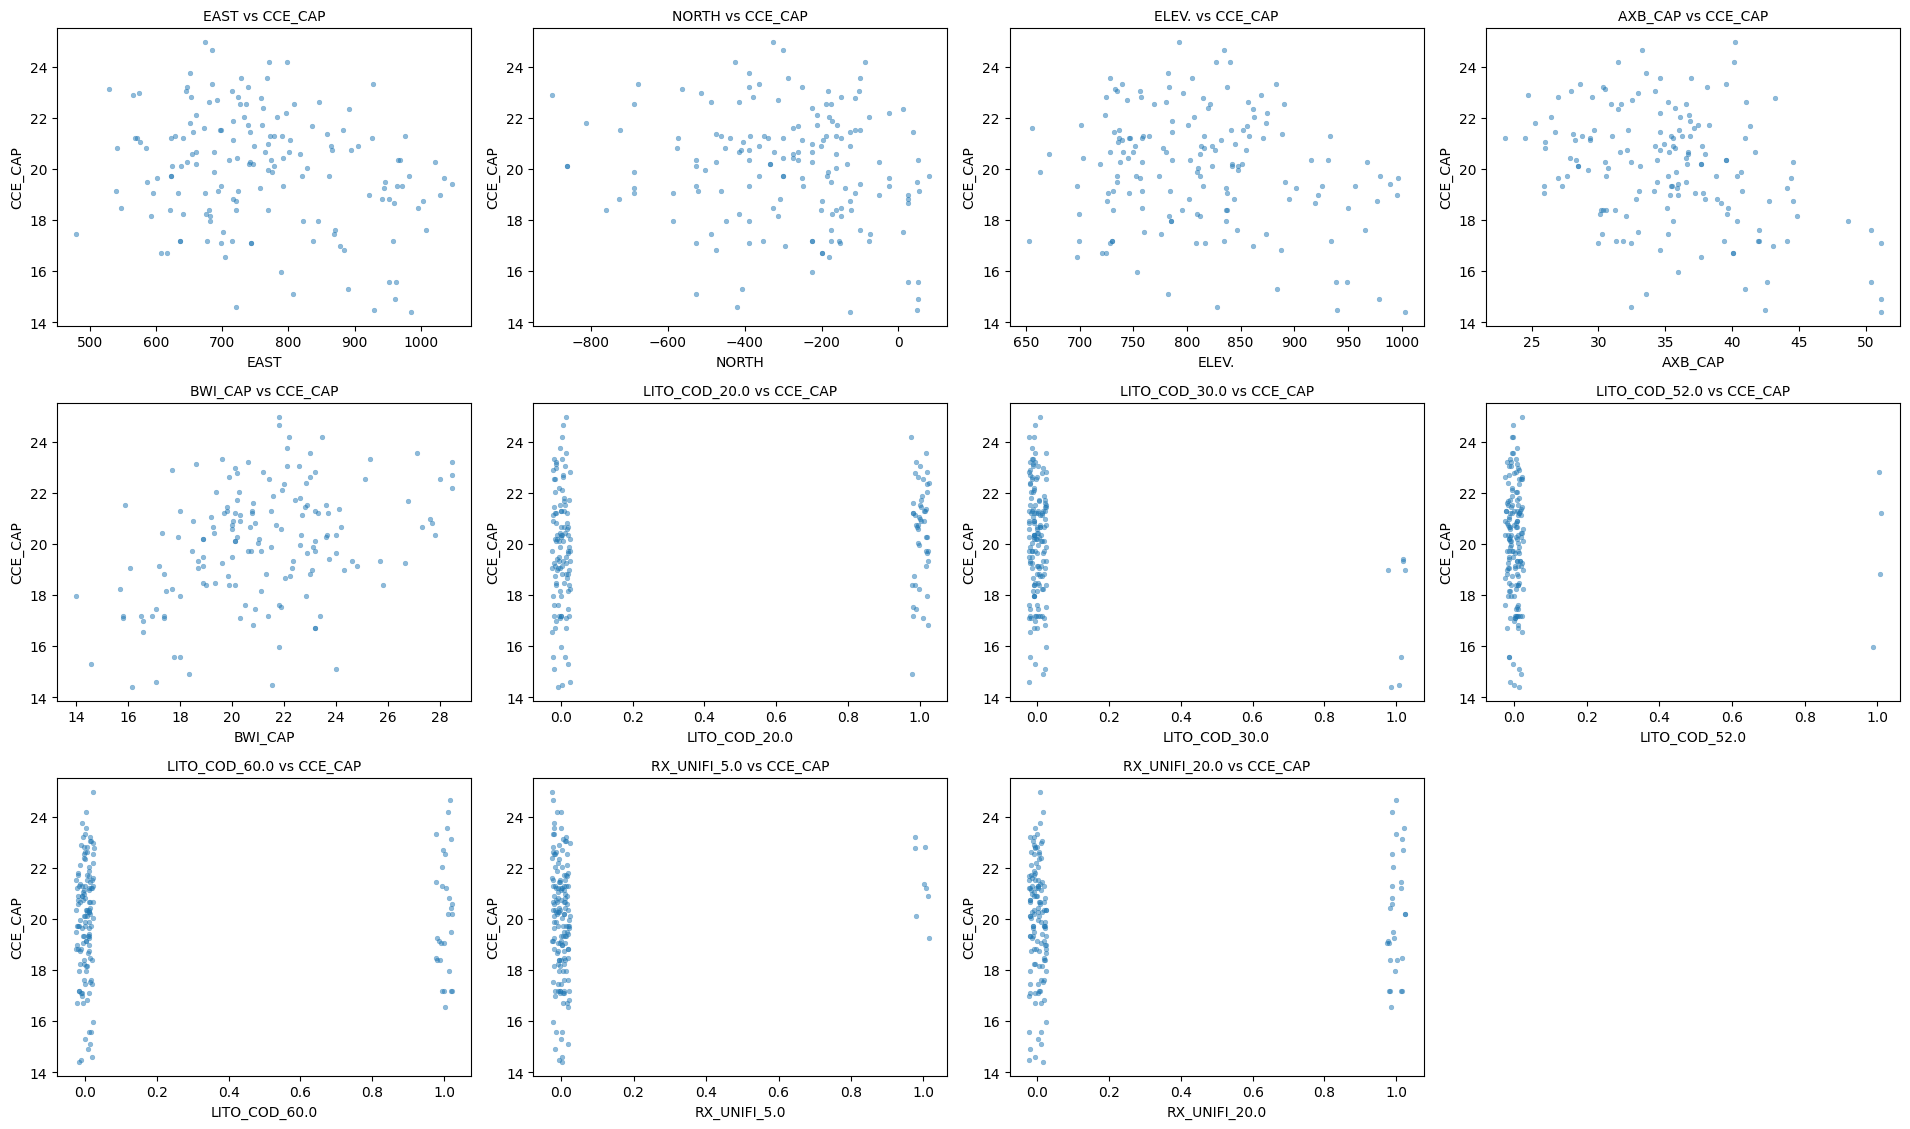

In [ ]:
# 1) Aseguro que todas las columnas existan en df_model
preds = [c for c in predictor_variables_encoded if c in df_model.columns and c != target_variable]
n = len(preds)
if n == 0:
    raise ValueError("No hay predictores válidos en df_model. Revisa predictor_variables_encoded.")

# 2) Grid dinámico
cols = math.ceil(math.sqrt(n))
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*4.8, rows*3.8))
axes = np.array(axes).reshape(-1)  # flatten en caso de 1 fila

y = df_model[target_variable].values

for i, col in enumerate(preds):
    ax = axes[i]
    x = df_model[col].values

    # Jitter suave si es binaria (0/1) o con muy pocos niveles
    if pd.Series(x).nunique() <= 2:
        jitter = np.random.uniform(-0.025, 0.025, size=len(x))
        x_plot = x + jitter
    else:
        x_plot = x

    sns.scatterplot(x=x_plot, y=y, s=12, alpha=0.5, ax=ax, edgecolor=None)
    ax.set_title(f'{col} vs {target_variable}', fontsize=10)
    ax.set_xlabel(col)
    ax.set_ylabel(target_variable)

# Apagar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Para las variables espaciales (EAST, NORTH, ELEV) vs CCE_CAP,** se puede decir que los diagramas muestran una dispersion de puntos, concluyendo que no hay una relacion lineal fuerte y simple entre la ubicacion y el CCE_CAP.

**Para AXB_CAP vs CCE_CAP**, muestra una tendencia general que a medidq que aumenta AXB_CAP el CCE_CAP disminuye. Interpretando esto es que a mayor AXB (resistencia de fractura) se requiere menor energia pàra la molienda.

**BWI_CAP vs CCE_CAP**, aqui se observa una tendencia que a medida que aumenta el BWI_CAP el CCE_CAP aumenta. Interpretando esto se puede relacionar el BWI es una medida directa de la resistencia a la molienda, a mayor resistencia implica mayor consumo energetico.

**Para las variables geológicas (LITO_COD y RX_UNIFI) vs CCE_CAP**, los diagramas de dispersión muestran puntos alineados verticalmente en los valores 0 y 1 del eje x. Esto es porque estas variables son categóricas (representadas como 0 o 1 después de aplicar one-hot encoding).

**Para LITO_COD_20.0, LITO_COD_30.0, LITO_COD_52.0, LITO_COD_60.0,** cada columna dummy representa una litología específica. Vemos que los bloques de cada litología tienen un rango de valores de CCE_CAP. Algunas litologías pueden tender a tener valores de CCE_CAP más altos o más bajos que otras, pero la relación no es una línea simple, sino una comparación de las distribuciones de CCE_CAP dentro de cada categoría.

**Para RX_UN,IFI_5.0 y RX_UNIFI_20.0**, cada columna dummy representa una clasificación de roca unificada. Observamos la distribución de CCE_CAP para los bloques que pertenecen a cada una de estas clasificaciones.

En resumen, los diagramas de dispersión nos dan una primera idea visual de como se comportan las variables predictoras frente a la variable objetivo. AXB_CAP y BWI_CAP muestran tendencias que son consistentes con el conocimiento del dominio, mientras que las variables espaciales y RX_UNIFI sugieren relaciones más complejas o no lineales que podrian requerir otro tipo de análisis o modelado. s variables categóricas, al ser transformadas con one-hot encoding, no mostrarán tendencias lineales en un scatter plot de esta manera, sino que nos permiten visualizar la distribución de la variable objetivo dentro de cada categoría. Este análisis es clave para la selección de variables y la comprensión de cómo interactúan entre sí y con el objetivo de predicción (CCE_CAP).

#### 3.3.3 Matriz de correlacion

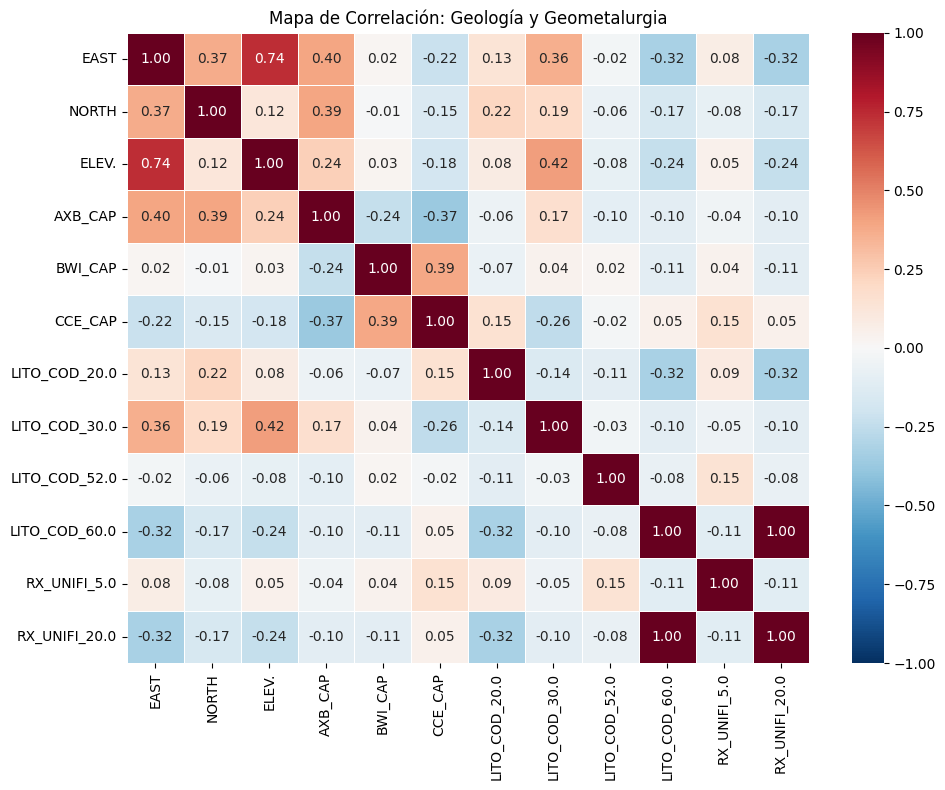

In [ ]:
# Todas las columnas NUMÉRICAS de df_model (incluye dummies y CCE_CAP)
corr_vars = df_model.select_dtypes(include=['number']).columns.tolist()

plot_correlation_map(df_model, corr_vars, title="Mapa de Correlación: Geología y Geometalurgia")

Se elimina la variable LITO_COD_60 dado que tiene un ajuste de correlacion perfcta con RX_UNIF_20. Se eligue arbitrariamente debido a que ambas categorías presentan la misma cantidad de datos, igual a 252, correspondiente a "Otros". Criterio utilizado según Gujarati y Porter (2010), cuando dos variables están perfectamente correlacionadas (ρ = 1), la multicolinealidad es perfecta, y “no es posible estimar de forma única los parámetros del modelo” (p. 338). En estos casos, se recomienda eliminar una de las variables redundantes.


<font color = "pink"> REVISAR OJITO <font color>

In [ ]:
df_model = df_model.drop(columns=["LITO_COD_60.0"])

**Relación entre AXB_CAP y CCE_CAP**, hay una correlación negativa moderada (-0.41. Esto refuerza lo que vimos en el diagrama de dispersión: a mayor resistencia a la fractura (AXB), menor tiende a ser el consumo de energía específico (CCE).

**Relación entre BWI_CAP y CCE_CAP,** hay una correlación positiva moderada (0.40) entre BWI_CAP y CCE_CAP. Esto también confirma la expectativa: a mayor Bond Work Index (resistencia a la molienda), mayor tiende a ser el consumo de energía específico.

**Relación entre Variables Espaciales y CCE_CAP:** Las variables espaciales (EAST, NORTH, ELEV.) muestran correlaciones débiles a moderadas con CCE_CAP (-0.26, 0.05, -0.33 respectivamente).

**Relación entre Variables Geológicas (LITO_COD, RX_UNIFI) y otras variables**: LITO_COD y RX_UNIFI muestran correlaciones variables con las otras propiedades.

En resumen, la matriz de correlación confirma las tendencias observadas en los diagramas de dispersión. Identifica las relaciones lineales más fuertes (CUT_CAP vs CUS_CAP, AXB_CAP vs CCE_CAP, y BWI_CAP vs CCE_CAP) y sugiere la importancia de considerar las variables espaciales y geológicas a pesar de no tener correlaciones lineales muy altas. Este análisis es clave para la selección de variables y la comprensión de cómo interactúan entre sí y con el objetivo de predicción (CCE_CAP).

#### 3.3.4 Correlacion de Pearson

In [ ]:
# 1) Lista de predictores a evaluar
if 'predictor_variables_encoded' in globals():
    predictors = [c for c in predictor_variables_encoded if c in df_model.columns and c != target_variable]
else:
    predictors = df_model.select_dtypes(include='number').columns.drop(target_variable).tolist()

resultados = []
for col in predictors:
    # Mantener solo filas completas para (col, target)
    par = df_model[[col, target_variable]].dropna()
    n_obs = len(par)

    # Si alguna es constante, pearsonr falla -> marcamos como NaN y seguimos
    if par[col].nunique() < 2 or par[target_variable].nunique() < 2 or n_obs < 2:
        resultados.append({
            "Variable": col,
            "Correlación": np.nan,
            "Valor P": np.nan,
            "Obs": n_obs,
            "Nota": "Columna/objetivo constante o muy pocos datos"
        })
        continue

    try:
        r, p = pearsonr(par[col].astype(float), par[target_variable].astype(float))
        resultados.append({
            "Variable": col,
            "Correlación": r,
            "Valor P": p,
            "Obs": n_obs,
            "Significativo (p<0.05)": p < 0.05
        })
    except Exception as e:
        resultados.append({
            "Variable": col,
            "Correlación": np.nan,
            "Valor P": np.nan,
            "Obs": n_obs,
            "Nota": f"Error: {e}"
        })

# 2) DataFrame ordenado por |r|
correlation_df = pd.DataFrame(resultados)
if "Correlación" in correlation_df.columns:
    correlation_df["abs_r"] = correlation_df["Correlación"].abs()
    correlation_df = correlation_df.sort_values("abs_r", ascending=False).drop(columns="abs_r")

# Completar la columna de significancia si faltó en algunas filas
if "Significativo (p<0.05)" not in correlation_df.columns:
    correlation_df["Significativo (p<0.05)"] = False
else:
    correlation_df["Significativo (p<0.05)"] = correlation_df["Significativo (p<0.05)"].fillna(False)

print("\nResultados de la Correlación de Pearson con CCE_CAP (ordenado por |r|):")
try:
    display(correlation_df)
except NameError:
    print(correlation_df.to_string(index=False))


Resultados de la Correlación de Pearson con CCE_CAP (ordenado por |r|):


,Variable,Correlación,Valor P,Obs,Significativo (p<0.05)
4,BWI_CAP,0.387,0.000,160,True
3,AXB_CAP,-0.369,0.000,160,True
6,LITO_COD_30.0,-0.258,0.001,160,True
0,EAST,-0.223,0.005,160,True
2,ELEV.,-0.180,0.023,160,True
8,RX_UNIFI_5.0,0.149,0.059,160,False
1,NORTH,-0.149,0.060,160,False
5,LITO_COD_20.0,0.149,0.061,160,False
9,RX_UNIFI_20.0,0.049,0.539,160,False
7,LITO_COD_52.0,-0.021,0.795,160,False


La prueba de Correlación de Pearson nos ayuda a cuantificar la fuerza y dirección de la relación lineal entre cada variable predictora y la variable objetivo CCE_CAP, además de indicar si esta relación es estadísticamente significativa (si es poco probable que la correlación observada se deba solo al azar).

AXB_CAP (-0.369): Se presenta una correlacion negativa moderada y significativa. Mayor AXB (resistencia a fractura) se asocia con menor CCE.

BWI_CAP (0.387): Se presenta una correlacion positiva moderada y significativa. Mayor BWI (resistencia a molienda) se asocia con mayor CCE.

EAST y ELEV. (-0.223 y -0.180): Correlaciones negativas débiles pero significativas. La ubicación espacial tiene una influencia lineal menor.

NORTH: No muestra correlación lineal estadísticamente significativa con CCE_CAP en esta prueba simple.

LITO_COD_20:

LITO_COD_60:


#### 3.3.5 Preparacion datos modelado

En esta sub-sección se prepara la base limpia **no imputada** de *Compositos* para modelar **CCE_CAP** y se ejecuta una selección inicial de características que ayude a identificar las variables predictoras más informativas.

- **Exclusiones explícitas:**  
  - **SGI / SGI_CAP** (correlación casi perfecta con CCE ⇒ redundancia y riesgo de sobreajuste).  
  - Cualquier columna con **`IMPUT`** en el nombre (por política del Hito: usar base limpia **no imputada**).  
  - Cualquier variante adicional de **CCE** distinta del objetivo (evitar fuga de información).

**Depuración y consistencia.**  
- Se trabaja con **casos completos** en predictores y objetivo (filas sin NaN en `predictor_variables + [CCE_CAP]`).  
- Se mantienen **valores capeados** (`*_CAP`) para atenuar outliers con datos reales (preferible a imputar).

**Partición entrenamiento/prueba.**  
- Se divide la muestra en **90% entrenamiento / 10% prueba** con `random_state=42`, cumpliendo el requerimiento del enunciado y garantizando reproducibilidad. Se setea la semilla aleatorea para reproducir los resultados.

**Escalamiento (Aux 2).**  
- Se aplica **MinMaxScaler (0–1)** **ajustado solo con el entrenamiento** y luego trasladado al conjunto de prueba (evita fuga de información).  
- Justificación: modelos sensibles a escala (p.ej., **regresión lineal**) y etapas posteriores (p.ej., SVM en clasificación) mejoran estabilidad numérica; para **árboles** no es necesario, pero no perjudica y unifica el *pipeline*.



In [ ]:
# ============================================================================
# Preparación: X/y -> split 90/10 -> MinMaxScaler -> SelectKBest (k=5)
# Requisitos previos:
#  - df_model: base limpia y NO imputada
#  - target_variable: 'CCE_CAP'
#  - predictor_variables: lista de predictores (sin SGI, sin 'IMPUT', sin otras CCE)
# ============================================================================

# 0) Resolver la lista de predictores que SÍ existen en df_model:
if 'predictor_variables_encoded' in globals():
    # Ya tienes la lista con dummies incluidas
    used_predictors = [c for c in predictor_variables_encoded
                       if c in df_model.columns and c != target_variable]
else:
    # Partimos de predictor_variables (puede incluir LITO_COD / RX_UNIFI base)
    # y las expandimos a sus dummies si no están tal cual en df_model.
    base_preds = [c for c in predictor_variables if c != target_variable]
    used_predictors = []
    for c in base_preds:
        if c in df_model.columns:
            used_predictors.append(c)
        else:
            # Intento expandir prefijo a dummies, p.ej. 'LITO_COD' -> 'LITO_COD_*'
            matches = [col for col in df_model.columns if isinstance(col, str) and col.startswith(f"{c}_")]
            used_predictors.extend(matches)

# Filtro finales: solo columnas presentes y numéricas
used_predictors = [c for c in used_predictors
                   if c in df_model.columns and pd.api.types.is_numeric_dtype(df_model[c])]
if len(used_predictors) == 0:
    raise ValueError("No quedaron predictores válidos en df_model (revisa las dummies y la lista de variables).")

print(f"[Predictores resueltos] n={len(used_predictors)} → ejemplo: {used_predictors[:8]}")

# 1) Construir X (predictores) e y (objetivo)
X = df_model[used_predictors].copy()
y = df_model[target_variable].copy()

# Chequeos rápidos
cols_upper = [c.upper() for c in X.columns]
assert all("SGI" not in c for c in cols_upper), "ERROR: Se coló una columna SGI en los predictores."
assert all("IMPUT" not in c for c in cols_upper), "ERROR: Se coló una columna imputada en los predictores."
assert target_variable in df_model.columns, f"ERROR: No encuentro la variable objetivo {target_variable}."

# 2) División 90/10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
print(f"[Split] 90/10 → X_train:{X_train.shape}, X_test:{X_test.shape}; y_train:{y_train.shape}, y_test:{y_test.shape}")

# 3) Escalado Min–Max (fit solo con train)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test),      columns=X_test.columns,  index=X_test.index)
print(f"[Escalado] Min–Max aplicado. Rango aprox. train: min={X_train_scaled.min().min():.3f}, max={X_train_scaled.max().max():.3f}")

# 4) SelectKBest (k=5 o el máximo posible si hay menos features)
k_features_to_select = 5
k_efectivo = min(k_features_to_select, X_train_scaled.shape[1])
selector = SelectKBest(score_func=f_regression, k=k_efectivo)
selector.fit(X_train_scaled, y_train)             # fit SOLO en train
X_train_sel = selector.transform(X_train_scaled)  # transformar train
X_test_sel  = selector.transform(X_test_scaled)   # transformar test

# Nombres seleccionados
selected_features_mask = selector.get_support()
selected_feature_names = X_train_scaled.columns[selected_features_mask].tolist()

print(f"[SelectKBest] Top {k_efectivo}: {selected_feature_names}")
print(f"[Post-selección] Shapes → X_train_sel:{X_train_sel.shape}, X_test_sel:{X_test_sel.shape}")

[Predictores resueltos] n=10 → ejemplo: ['EAST', 'NORTH', 'ELEV.', 'AXB_CAP', 'BWI_CAP', 'LITO_COD_20.0', 'LITO_COD_30.0', 'LITO_COD_52.0']
[Split] 90/10 → X_train:(144, 10), X_test:(16, 10); y_train:(144,), y_test:(16,)
[Escalado] Min–Max aplicado. Rango aprox. train: min=0.000, max=1.000
[SelectKBest] Top 5: ['EAST', 'NORTH', 'AXB_CAP', 'BWI_CAP', 'LITO_COD_30.0']
[Post-selección] Shapes → X_train_sel:(144, 5), X_test_sel:(16, 5)


In [ ]:
# Ya creados: X_train_sel, X_test_sel (salida de SelectKBest)
print(f"[Post-selección] Shapes -> X_train_sel:{X_train_sel.shape}, X_test_sel:{X_test_sel.shape}")

# Explicación en español
n_train, k_train = X_train_sel.shape
n_test,  k_test  = X_test_sel.shape
print(
    "\n[Explicación] 'shape' se lee como (filas, columnas):\n"
    f"- X_train_sel tiene {n_train} filas (ejemplos de entrenamiento) y {k_train} columnas (features seleccionadas).\n"
    f"- X_test_sel  tiene {n_test} filas (ejemplos de prueba) y {k_test} columnas (mismas features seleccionadas).\n"
    f"Recuerda: k = {k_train} es el número de variables elegidas por SelectKBest (k={k_features_to_select})."
)

[Post-selección] Shapes -> X_train_sel:(144, 5), X_test_sel:(16, 5)

[Explicación] 'shape' se lee como (filas, columnas):
- X_train_sel tiene 144 filas (ejemplos de entrenamiento) y 5 columnas (features seleccionadas).
- X_test_sel  tiene 16 filas (ejemplos de prueba) y 5 columnas (mismas features seleccionadas).
Recuerda: k = 5 es el número de variables elegidas por SelectKBest (k=5).


#### 3.3.6 Modelos de Regresion

In [ ]:
# Función: evaluar_modelos_regresion
# Benchmark de 4 modelos (RL, DT, RF, GB) sobre un conjunto dado (train/test)
# - Usa los objetos YA creados: X_train_sel / X_test_sel (o X_train_scaled / X_test_scaled), y_train, y_test.
# - No reimporta librerías.
# - Devuelve un DataFrame con MAE, MSE, RMSE y tiempos; imprime el ganador por RMSE.
# ====================================================================================
def evaluar_modelos_regresion(Xtr, Xte, y_train, y_test, models=None, etiqueta="Conjunto"):
    """
    Parámetros
    ----------
    Xtr, Xte : DataFrame/ndarray
        Matrices de entrenamiento y prueba (mismas columnas).
    y_train, y_test : Series/ndarray
        Vectores objetivo.
    models : dict (opcional)
        Diccionario {nombre: estimador}. Si es None, usa los 4 requeridos.
    etiqueta : str
        Texto para identificar el conjunto de features usado (ej: 'Top-5', 'Todas escaladas').

    Retorna
    -------
    resultados_df : pd.DataFrame
        Tabla con métricas (ordenado por RMSE ascendente).
    """
    # Modelos por defecto (si no se pasan)
    if models is None:
        models = {
            "Regresión lineal múltiple": LinearRegression(),
            "Decision Tree": DecisionTreeRegressor(random_state=42),
            "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
            "Gradient Boosting": GradientBoostingRegressor(random_state=42),
        }

    # Mensaje breve del conjunto usado
    try:
        n_feats = Xtr.shape[1]
        print(f"[Benchmark · {etiqueta}] Nº de variables: {n_feats}")
    except Exception:
        print(f"[Benchmark · {etiqueta}]")

    resultados = []
    for nombre, modelo in models.items():
        print(f"Entrenando y evaluando: {nombre}")

        t0 = time.perf_counter()
        modelo.fit(Xtr, y_train)               # entreno
        t1 = time.perf_counter()
        y_pred = modelo.predict(Xte)           # predigo en test
        t2 = time.perf_counter()

        mae  = mean_absolute_error(y_test, y_pred)
        mse  = mean_squared_error(y_test, y_pred)
        rmse = float(np.sqrt(mse))

        resultados.append({
            "Modelo": nombre,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "Tiempo cómputo en test [s]": (t2 - t1),
            "Tiempo entrenamiento [s]": (t1 - t0),
            "Conjunto": etiqueta,
        })

    # Tabla ordenada por RMSE (↓) y redondeada
    resultados_df = (
        pd.DataFrame(resultados)
          .sort_values("RMSE")
          .reset_index(drop=True)
          .round({"MAE":4, "MSE":4, "RMSE":4, "R2":4,
                  "Tiempo cómputo en test [s]":4, "Tiempo entrenamiento [s]":4})
    )

    print("\nMétricas en el conjunto de PRUEBA (10%):")
    try:
        display(resultados_df)
    except NameError:
        print(resultados_df.to_string(index=False))

    mejor = resultados_df.iloc[0]
    print(f"\n➡ Mejor modelo (por RMSE): {mejor['Modelo']} "
          f"| RMSE={mejor['RMSE']}, MAE={mejor['MAE']}, MSE={mejor['MSE']} | Conjunto={mejor['Conjunto']}")

    return resultados_df

In [ ]:
# Usa las matrices que ya calculaste con SelectKBest
res_topk = evaluar_modelos_regresion(
    X_train_sel, X_test_sel, y_train, y_test,
    etiqueta=f"Top-{X_train_sel.shape[1]} (SelectKBest)")

[Benchmark · Top-5 (SelectKBest)] Nº de variables: 5
Entrenando y evaluando: Regresión lineal múltiple
Entrenando y evaluando: Decision Tree
Entrenando y evaluando: Random Forest
Entrenando y evaluando: Gradient Boosting

Métricas en el conjunto de PRUEBA (10%):


,Modelo,MAE,MSE,RMSE,Tiempo cómputo en test [s],Tiempo entrenamiento [s],Conjunto
0,Regresión lineal múltiple,1.904,4.761,2.182,0.000,0.013,Top-5 (SelectKBest)
1,Random Forest,1.998,5.398,2.323,0.034,0.208,Top-5 (SelectKBest)
2,Gradient Boosting,2.233,6.601,2.569,0.001,0.121,Top-5 (SelectKBest)
3,Decision Tree,2.369,7.853,2.802,0.000,0.003,Top-5 (SelectKBest)



➡ Mejor modelo (por RMSE): Regresión lineal múltiple | RMSE=2.182, MAE=1.9039, MSE=4.7611 | Conjunto=Top-5 (SelectKBest)


La **Regresión lineal múltiple** con el **Top-5** ofrece  el **mejor modelo** con el **menor error** de predicción en test y **máxima interpretabilidad** con un pipeline simple y reproducible.

# 4 Evaluar la significancia de las variables utilizadas en su modelo predictivo construido mediante regresión lineal múltiple

Evaluamos la **significancia de las variables** del modelo de **Regresión Lineal Múltiple** (usando las features Top-k ya seleccionadas).  
Luego construimos un **modelo reducido** con solo las variables **significativas** y comparamos ambos mediante una **prueba F de modelos anidados**.  
Además, mostramos una tabla estilo **stargazer** (coeficiente con asteriscos y error estándar entre paréntesis).

In [ ]:
# ============================================================
# FULL desde df_model + backward elimination + comparación
# Requisitos previos ya existentes:
#  - df_model  (numérico, con dummies, incluye 'CCE_CAP')
#  - target_variable = 'CCE_CAP'
#  - X_train, X_test, y_train, y_test (ya definidos arriba)
#  - mean_squared_error, mean_absolute_error importados
#  - statsmodels importado (sm). Si no, descomenta los imports.
# ============================================================

# 0) Definir columnas FULL: todas las numéricas de df_model excepto el target
full_cols = df_model.select_dtypes(include='number').columns.tolist()
full_cols = [c for c in full_cols if c != target_variable and "CCE" not in c.upper()]  # evita variantes de CCE

# 1) Alinear con los índices del split previo (por si hubo dropna en otro paso)
idx_tr = X_train.index.intersection(df_model.index)
idx_te = X_test.index.intersection(df_model.index)

Xtr_full = df_model.loc[idx_tr, full_cols].copy()
ytr      = df_model.loc[idx_tr, target_variable].copy()
Xte_full = df_model.loc[idx_te, full_cols].copy()
yte      = df_model.loc[idx_te, target_variable].copy()

print(f"[FULL df_model] X_train:{Xtr_full.shape} | X_test:{Xte_full.shape} | y_train:{ytr.shape} | y_test:{yte.shape}")

# ------------------------------------------------------------
# Funciones auxiliares (sirven tal cual)
# ------------------------------------------------------------
def fit_ols(X, y):
    Xc = sm.add_constant(X, has_constant="add")
    return sm.OLS(y, Xc).fit()

def predict_with(res, X):
    needed = [c for c in res.params.index if c != "const"]
    Xc = sm.add_constant(X, has_constant="add")
    Xc = Xc.reindex(columns=["const"] + needed, fill_value=0.0)
    return res.predict(Xc)

def backward_elimination(X, y, alpha=0.01):
    """
    Devuelve lista de (nombre_modelo, columnas_usadas, resultado_OLS)
    Empieza en FULL y elimina la variable con mayor p>alpha (sin 'const') en cada iteración.
    """
    pasos = []
    cols = list(X.columns)
    paso = 0
    while True:
        res = fit_ols(X[cols], y)
        nombre = "Full" if paso == 0 else ("Final" if True else f"Step {paso}")
        pasos.append((nombre, cols.copy(), res))
        pvals = res.pvalues.drop(labels="const", errors="ignore")
        if pvals.empty or pvals.max() <= alpha:
            break
        worst = pvals.idxmax()
        cols.remove(worst)
        paso += 1

    # Renombrar: Full, Step 1..n-1, Final
    if len(pasos) >= 2:
        for i in range(1, len(pasos)-1):
            pasos[i] = (f"Step {i}", pasos[i][1], pasos[i][2])
        pasos[-1] = ("Final", pasos[-1][1], pasos[-1][2])
    else:
        pasos[0] = ("Full", pasos[0][1], pasos[0][2])
    return pasos

# 2) Backward elimination desde el FULL (df_model)
ruta = backward_elimination(Xtr_full, ytr, alpha=0.05)   # [(name, cols, res_ols), ...]
model_names = [name for name, _, _ in ruta]
res_seq     = [res  for _, _, res in ruta]

# 3) Tabla “stargazer” con summary_col (stars=True) para TODOS los pasos
try:
    _ = summary_col
except NameError:
    from statsmodels.iolib.summary2 import summary_col

print("\n=== Comparación de modelos anidados (summary_col, stars=True) ===")
comp = summary_col(
    results=res_seq,
    model_names=model_names,
    stars=True,
    info_dict={
        "N":      lambda x: f"{int(x.nobs)}",
        "AIC":    lambda x: f"{x.aic:.1f}",
        "BIC":    lambda x: f"{x.bic:.1f}",
    }
)
print(comp)



[FULL df_model] X_train:(144, 10) | X_test:(16, 10) | y_train:(144,) | y_test:(16,)

=== Comparación de modelos anidados (summary_col, stars=True) ===

                  Full      Step 1     Step 2     Step 3     Step 4     Step 5     Step 6     Final   
------------------------------------------------------------------------------------------------------
const          17.7509*** 17.7637*** 17.5483*** 18.5737*** 19.2783*** 19.1509*** 19.3406*** 18.7440***
               (2.5711)   (2.1352)   (2.1186)   (1.8975)   (1.7816)   (1.7843)   (1.7856)   (1.7055)  
EAST           -0.0018    -0.0018    -0.0018    -0.0021    -0.0025*   -0.0021    -0.0016              
               (0.0021)   (0.0015)   (0.0015)   (0.0015)   (0.0015)   (0.0015)   (0.0014)             
NORTH          -0.0010    -0.0010    -0.0010                                                          
               (0.0009)   (0.0009)   (0.0009)                                                         
ELEV.          0.0000   

In [ ]:

# 4) Desempeño en TEST de cada paso y elección del mejor por RMSE
def rmse_score(y_true, y_pred):
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))  # compatible versiones antiguas

metricas = []
for name, cols, res in ruta:
    yhat = predict_with(res, Xte_full[cols])
    y_true = np.asarray(yte).ravel()
    y_pred = np.asarray(yhat).ravel()
    rmse = rmse_score(y_true, y_pred)
    mae  = mean_absolute_error(y_true, y_pred)


    # Añadimos R² ajustado del entrenamiento desde el resultado OLS
    r2_adj_train = float(res.rsquared_adj)

    metricas.append({
        "Modelo": name,
        "k_vars": len(cols),
        "RMSE_test": rmse,
        "MAE_test": mae,
        "R2_adj_train": r2_adj_train
    })

metricas_df = pd.DataFrame(metricas).sort_values("RMSE_test").reset_index(drop=True)
print("\n=== Desempeño en TEST (ordenado por RMSE ascendente) ===")
print(metricas_df.to_string(index=False))

mejor = metricas_df.iloc[0]
print(
    f"\n>> Mejor modelo lineal (por RMSE en TEST): {mejor['Modelo']} "
    f"con {int(mejor['k_vars'])} variables | RMSE={mejor['RMSE_test']:.3f} "
    f"| MAE={mejor['MAE_test']:.3f} | R² ajustado (train)={mejor['R2_adj_train']:.3f}"
)


=== Desempeño en TEST (ordenado por RMSE ascendente) ===
Modelo  k_vars  RMSE_test  MAE_test  R2_adj_train
Step 3       7      1.893     1.614         0.264
Step 4       6      1.908     1.659         0.263
Step 5       5      1.963     1.645         0.259
Step 2       8      2.015     1.735         0.265
Step 1       9      2.032     1.756         0.264
  Full      10      2.032     1.756         0.258
 Final       3      2.038     1.717         0.252
Step 6       4      2.078     1.766         0.254

>> Mejor modelo lineal (por RMSE en TEST): Step 3 con 7 variables | RMSE=1.893 | MAE=1.614 | R² ajustado (train)=0.264



**Objetivo del hito:** predecir **CCE** con el **menor error posible** en datos **no vistos** (conjunto de prueba del 10%).  
Por eso el criterio principal es el **RMSE en test**:

- **Directamente interpretable:** el RMSE está en **unidades de CCE**; indica el tamaño típico del error de predicción.
- **Penaliza fuertemente errores grandes:** al basarse en el MSE, desincentiva outliers de predicción.
- **Mide generalización:** lo calculamos en **test**, que es lo que importa para completar el modelo de bloques.
- **Comparable entre familias de modelos:** sirve igual para OLS, árboles, ensambles, etc.  
  En cambio, el **R² ajustado** está definido para OLS (entrenamiento) y **no** compara bien con RF/GB/DT; además, tener más R² adj. en **train** no garantiza mejor desempeño en **test**.

En la secuencia de modelos anidados por *backward elimination*, **Step 3** fue el que logró el **mínimo RMSE en test**:

Finalmente, se optó por el Modelo 3 (OLS Step 3), construido con las siguientes variables: ['EAST', 'AXB_CAP', 'BWI_CAP', 'LITO_COD_20.0', 'LITO_COD_30.0', 'RX_UNIFI_5.0', 'RX_UNIFI_20.0'].



$$ CCE = 18.5737 - 0.0021 \cdot EAST - 0.0828 \cdot AXB_CAP + 0.2705 \cdot BWI + 0.6215 \cdot \text{LITO_COD_20} -1.7226\cdot text{LITO_COD_30} + 1.1202 \cdot \text{RX_UNIFI_5} + 0.4772\cdot \text{RX_UNIFI_20} $$




La elección se justifica a que esta especificación mostró el mejor desempeño en el conjunto de prueba (menor RMSE), aun cuando incorpora algunos predictores no significativos al 99%.

La falta de significancia individual puede estar asociada a multicolinealidad entre variables (inflando los errores estándar) o a bajo poder estadístico, mientras que, en conjunto, la especificación entrega mejor capacidad predictiva.

In [ ]:

# 1) Tomo las columnas exactas del Step
cols_step = None
res_step = None
for name, cols, res in ruta:
    if name == "Step 3":
        cols_step = cols
        res_step = res
        break

# Seguridad: si no se encontró "Step 3", muestro opciones disponibles
if cols_step is None:
    disponibles = [name for name, _, _ in ruta]
    raise ValueError(f"No encontré 'Step' en ruta. Pasos disponibles: {disponibles}")

print(f"[Step] Nº de variables: {len(cols_step)}")
print(f"[Step] Variables: {cols_step}")

# 2) Defino los sets de train/test con esas columnas (ya alineadas entre Xtr_full/Xte_full)
Xtr_step = Xtr_full[cols_step].copy()
Xte_step = Xte_full[cols_step].copy()

# 3) Corro el benchmark con TU función evaluar_modelos_regresion
res_step_models = evaluar_modelos_regresion(
    Xtr_step, Xte_step, ytr, yte,
    etiqueta=f"OLS Step  ({len(cols_step)} vars)"
)

[Step] Nº de variables: 7
[Step] Variables: ['EAST', 'AXB_CAP', 'BWI_CAP', 'LITO_COD_20.0', 'LITO_COD_30.0', 'RX_UNIFI_5.0', 'RX_UNIFI_20.0']
[Benchmark · OLS Step  (7 vars)] Nº de variables: 7
Entrenando y evaluando: Regresión lineal múltiple
Entrenando y evaluando: Decision Tree
Entrenando y evaluando: Random Forest
Entrenando y evaluando: Gradient Boosting

Métricas en el conjunto de PRUEBA (10%):


,Modelo,MAE,MSE,RMSE,Tiempo cómputo en test [s],Tiempo entrenamiento [s],Conjunto
0,Regresión lineal múltiple,1.613,3.584,1.893,0.001,0.002,OLS Step (7 vars)
1,Gradient Boosting,1.957,5.179,2.276,0.002,0.103,OLS Step (7 vars)
2,Random Forest,1.994,5.253,2.292,0.038,0.201,OLS Step (7 vars)
3,Decision Tree,3.135,12.691,3.562,0.002,0.004,OLS Step (7 vars)



➡ Mejor modelo (por RMSE): Regresión lineal múltiple | RMSE=1.8932, MAE=1.6135, MSE=3.5844 | Conjunto=OLS Step  (7 vars)


# 5 Scatter plot - valores reales vs los valores estimados

Se realiza un scatter plot para comparar los valores reales vs los valores estimados de CCE considerando los datos del conjunto de prueba en su escala original.v

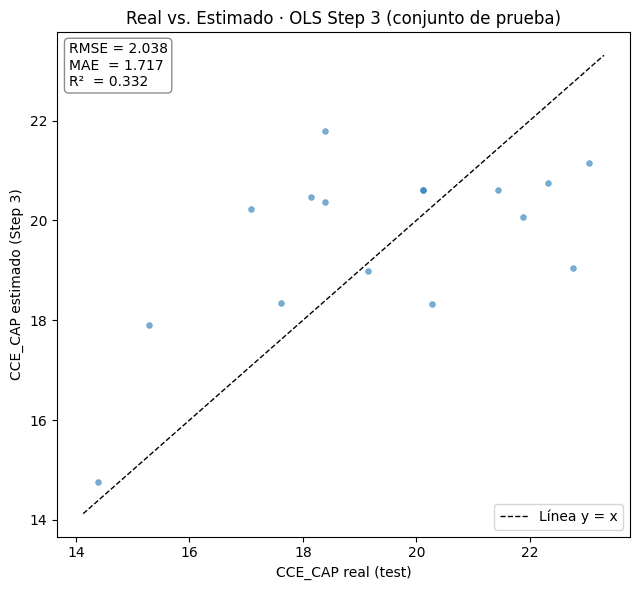

In [ ]:
# ======================================
# Cálculo de R² ajustado
# ======================================
n = len(y_true)            # número de observaciones (test)
p = Xte_step.shape[1]      # número de predictores usados en Step 3
r2   = float(r2_score(y_true, y_pred))

# ======================================
# Scatter plot Real vs Estimado con línea y=x
# ======================================
plt.figure(figsize=(6.5, 6))
sns.scatterplot(x=y_true, y=y_pred, s=18, alpha=0.6, edgecolor=None)

mn = min(y_true.min(), y_pred.min())
mx = max(y_true.max(), y_pred.max())
pad = 0.03 * (mx - mn)

# Línea y=x
plt.plot([mn - pad, mx + pad], [mn - pad, mx + pad],
         'k--', linewidth=1, label='Línea y = x')

plt.xlabel("CCE_CAP real (test)")
plt.ylabel("CCE_CAP estimado (Step 3)")
plt.title("Real vs. Estimado · OLS Step 3 (conjunto de prueba)")

# Leyenda en la esquina inferior derecha
plt.legend(loc="lower right", frameon=True)

# Anotación con métricas en la esquina superior izquierda
txt = (f"RMSE = {rmse:.3f}\n"
       f"MAE  = {mae:.3f}\n"
       f"R²  = {r2:.3f}")
plt.gca().text(0.02, 0.98, txt, transform=plt.gca().transAxes,
               va='top', ha='left',
               bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9))

plt.tight_layout()
plt.show()


# 6 Modelo predictivo del CCE en el modelo de bloques

Se genera un modelo predictivo del CCE en el modelo de bloques (archivo
MB.csv) usando el mejor modelo generado en este Hito. Se hace referencia a la capacidad de
generalización que posee el modelo para predecir la propiedad geometalúrgica y
presente estadísticas descriptivas de las predicciones de CCE.

In [ ]:
# Tomamos las columnas exactas del Step 3
cols_step = None
res_step = None
for name, cols, res in ruta:
    if name == "Step 3":
        cols_step = cols
        res_step = res
        break

if cols_step is None:
    disponibles = [name for name, _, _ in ruta]
    raise ValueError(f"No encontré 'Step 3' en ruta. Pasos disponibles: {disponibles}")

print(f"[Step 3] Nº de variables: {len(cols_step)}")
print(f"[Step 3] Variables: {cols_step}")


[Step 3] Nº de variables: 7
[Step 3] Variables: ['EAST', 'AXB_CAP', 'BWI_CAP', 'LITO_COD_20.0', 'LITO_COD_30.0', 'RX_UNIFI_5.0', 'RX_UNIFI_20.0']


In [ ]:
# Crear dummies solo de las categóricas detectadas
df_mb_pp = pd.get_dummies(df_mb.copy(), columns=cat_bases, drop_first=True, dtype=float) if cat_bases else df_mb.copy()
df_mb_pp.head()

,EAST,NORTH,ELEV,AXB,BWI,CUT,CUS,DENSI,LITO_20.0,LITO_30.0,LITO_51.0,LITO_52.0,LITO_60.0,RX_5,RX_20
0,740.620,-796.880,987.500,31.897,21.945,0.640,0.035,2.713,1.000,0.000,0.000,0.000,0.000,0.000,0.000
1,746.880,-796.880,987.500,31.910,21.940,0.617,0.031,2.709,1.000,0.000,0.000,0.000,0.000,0.000,0.000
2,753.120,-796.880,987.500,31.877,21.934,0.547,0.024,2.699,1.000,0.000,0.000,0.000,0.000,0.000,0.000
3,759.380,-796.880,987.500,31.806,21.926,0.383,0.014,2.709,1.000,0.000,0.000,0.000,0.000,0.000,0.000
4,765.620,-796.880,987.500,31.708,21.918,0.379,0.017,2.715,1.000,0.000,0.000,0.000,0.000,0.000,0.000


# 9 Referencias

1. Gujarati, D. N., & Porter, D. C. (2010). Econometría (5.ª ed., pp. 336-340). McGraw-Hill.